# NeurIPS Results

## Preparations

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

IS_FORCE_CPU = True

import os
import sys

from results import *


if IS_FORCE_CPU:
    os.environ["CUDA_VISIBLE_DEVICES"] = ""

sys.path.append("notebooks")

Autosaving every 600 seconds


In [2]:
os.chdir("..")

In [ ]:
# data
(
    train_datasets,
    test_datasets,
    _,
    _,
) = get_datasets_images(names=['mnist', 'celeba32', 'svhn', "zsmms"]) #'zsmm', 'zsmmt', 

In [ ]:
# models
trainers= {}

In [ ]:
from utils.visualize.visualize_imgs import *

In [ ]:
#plot_dataset_samples_imgs(train_datasets["zsmms"], figsize=(9,5))
#plot_dataset_samples_imgs(test_datasets["zsmms"], figsize=(9,5))

## Qualitative

## Additional

In [ ]:
trainers.update(get_trained_models(experiments=["exp_allmm_hetero_lb01"],ith=1))

In [ ]:
trainers.update(get_trained_models(experiments=["exp_allmm_hetero_lb01"],ith=1))
trainers.update(get_trained_models(experiments=["exp_allmm_hetero_lb001"], ith=1))

In [ ]:
trainers.update(get_trained_models(experiments=["exp_hetero_lb01"]))

In [ ]:
trainers.update(get_trained_models(experiments=["exp_final3_losses"], ith=0))

In [ ]:
get_efficiency({k:v for k,v in trainers.items() if "exp_final3_allmm_hetero" in k})

In [36]:
trainers.keys()

dict_keys(['exp_allmm_hetero_lb01/zsmms/SelfAttnNPF_NllLNPF/run_0', 'exp_allmm_hetero_lb001/zsmms/SelfAttnNPF_NllLNPF/run_0', 'exp_hetero_lb01/mnist/ConvNPFXL_NllLNPF/run_0', 'exp_hetero_lb01/mnist/ConvNPFL_NllLNPF/run_0', 'exp_hetero_lb01/mnist/SelfAttnNPF_NllLNPF/run_0', 'exp_hetero_lb01/mnist/ConvNPFXL_ElboLNPF/run_0', 'exp_hetero_lb01/mnist/ConvNPFL_ElboLNPF/run_0', 'exp_hetero_lb01/mnist/SelfAttnNPF_ElboLNPF/run_0', 'exp_final3_losses/mnist/ConvNPFXL_NllLNPF/run_0', 'exp_allmm_hetero_lb01_b/zsmms/ConvNPFXL_NllLNPF/run_0', 'exp_allmm_hetero_lb01_b/zsmms/ConvNPFL_NllLNPF/run_0', 'exp_allmm_hetero_lb01_b/zsmms/ConvNPFXL_ElboLNPF/run_0', 'exp_allmm_hetero_lb01_b/zsmms/ConvNPFL_ElboLNPF/run_0', 'exp_allmm_hetero_lb01/zsmms/SelfAttnNPF_ElboLNPF/run_0', 'exp_final3_allmm/zsmms/ConvNPFL_NllLNPF/run_0', 'exp_final3_allmm/zsmms/SelfAttnNPF_NllLNPF/run_0', 'exp_final3_allmm/zsmms/ConvNPFL_ElboLNPF/run_0', 'exp_final3_allmm/zsmms/SelfAttnNPF_ElboLNPF/run_0'])

### Samples ConvLNP

(-0.5, 359.5, 233.5, -0.5)

Text(0.5, 1.0, 'ConvNP Homo')

(-0.5, 359.5, 233.5, -0.5)

Text(0.5, 1.0, 'ConvNP XL LB 0.1')

(-0.5, 359.5, 233.5, -0.5)

Text(0.5, 1.0, 'ConvNP L LB 0.1')

(-0.5, 359.5, 233.5, -0.5)

Text(0.5, 1.0, 'ANP LB 0.1')

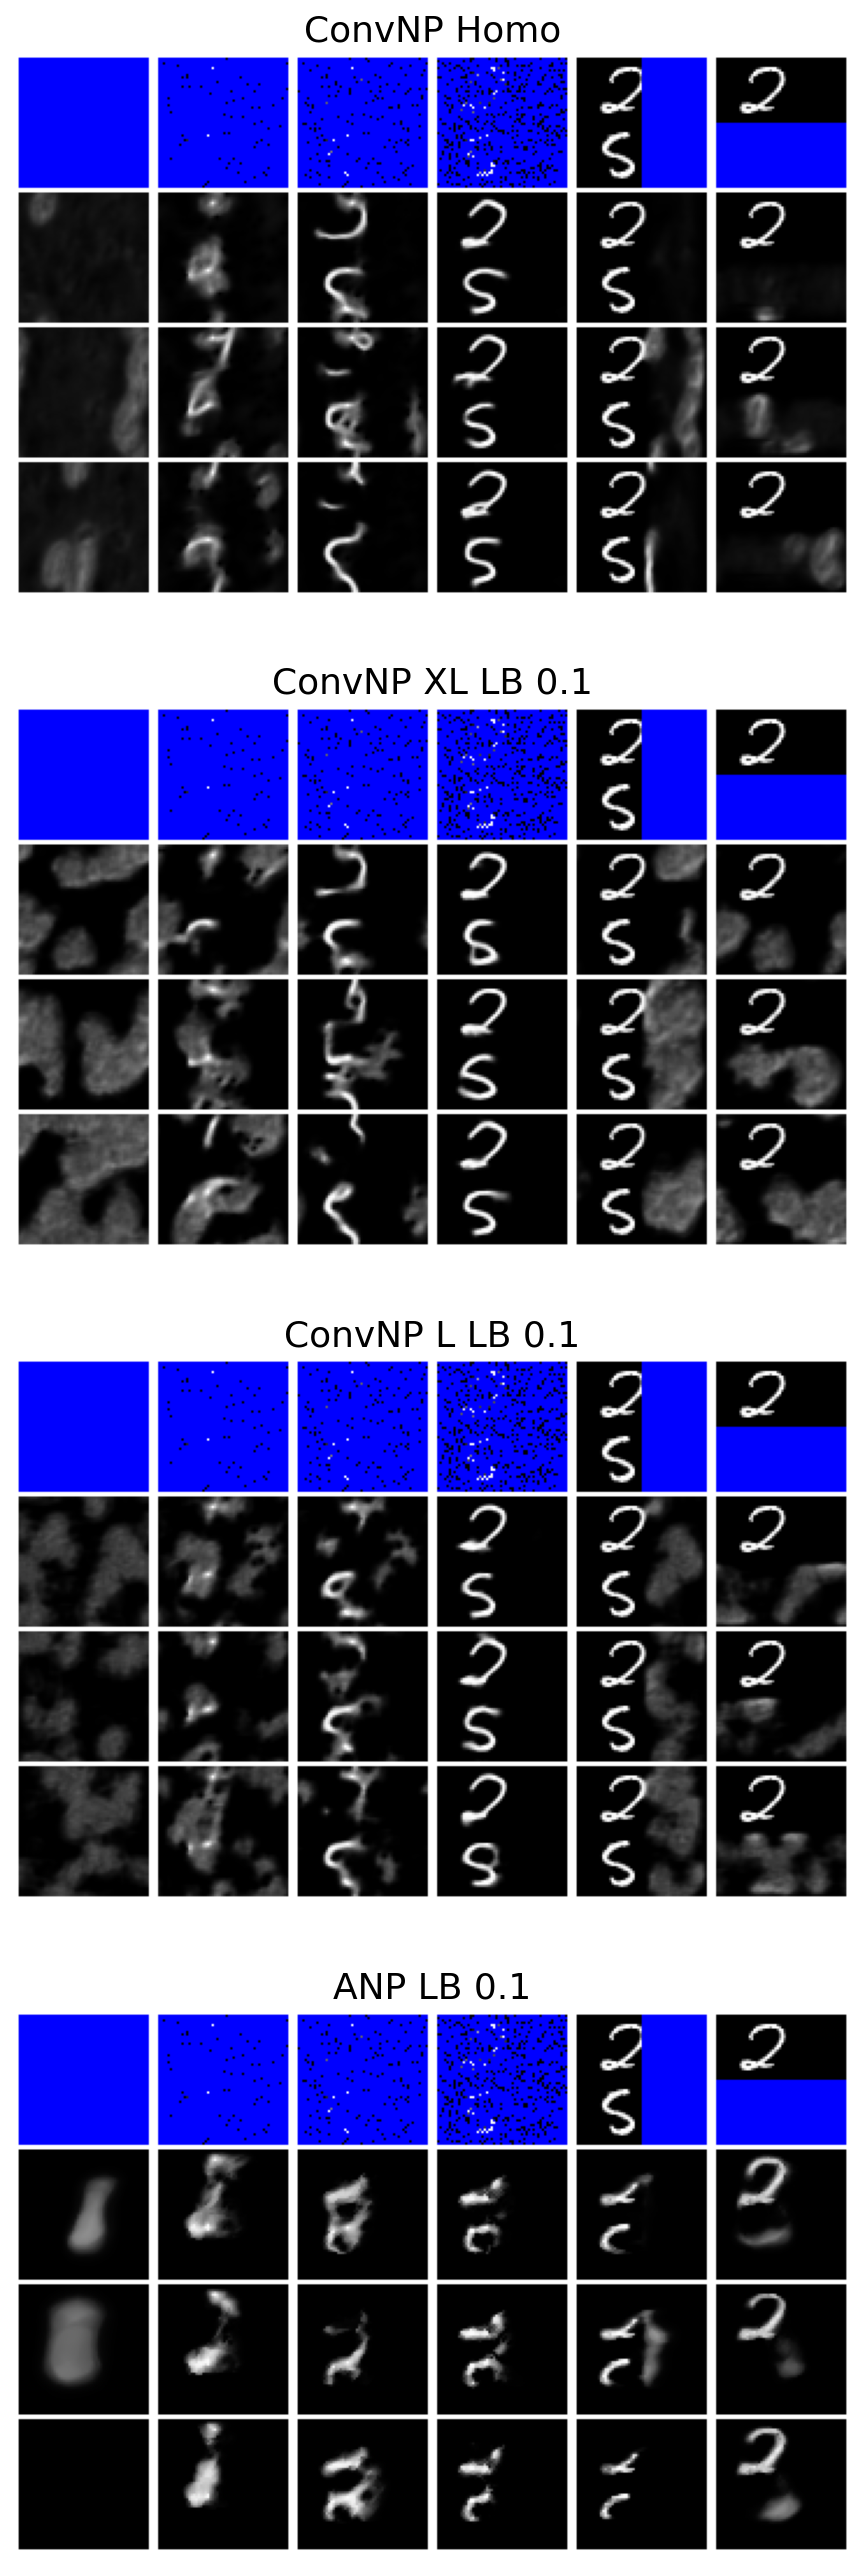

In [35]:
 

# 3 pixel, 1%, 5%, 10%, 20%, 30%, 50%, 100%, Half Bottom, Half Right
# Rows "mnist", "celeba32", "celeba64", "zs-multi-mnist", "svhn"
# use small model for "zs-multi-mnist"

context_maskers = [RandomMasker(min_nnz=0, max_nnz=0),
                   RandomMasker(min_nnz=0.02, max_nnz=0.02),
                   RandomMasker(min_nnz=0.05, max_nnz=0.05),
                   RandomMasker(min_nnz=0.15, max_nnz=0.15),
                   partial(half_masker, dim=1),
                   partial(half_masker, dim=0),
                  ]

data_models = [
               ("ConvNP Homo", "zsmms", "exp_final3_allmm/zsmms/ConvNPFL_NllLNPF"), 
               ("ConvNP XL LB 0.1", "zsmms", "exp_allmm_hetero_lb01_b/zsmms/ConvNPFXL_NllLNPF"),
                ("ConvNP L LB 0.1", "zsmms", "exp_allmm_hetero_lb01_b/zsmms/ConvNPFL_NllLNPF"),
                ("ANP LB 0.1", "zsmms", "exp_allmm_hetero_lb01/zsmms/SelfAttnNPF_NllLNPF"),
              ]

fig, axes = plt.subplots(len(data_models), 1, figsize=(15,23))


for i,(title, data, model) in enumerate(data_models):
    grid = torch.cat([plot_posterior_samples(test_datasets[data], 
                                      GridCntxtTrgtGetter(context_masker=c,
                                                          target_masker=no_masker), 
                                      trainers['{}/run_0'.format(model)].module_.cpu(), 
                                      n_plots=1,
                                      is_uniform_grid="ConvNP" in model,
                                      is_return=True,
                                      n_samples=3,
                                      is_select_different=True,
                                      seed=13 +  int("celeba64" in model)) # don't  show same images for celeba32 and celeba64
        for c in context_maskers], dim=2)

    axes[i].imshow(grid.permute(1, 2, 0).numpy())
    axes[i].axis("off")
    axes[i].set_title(title, fontsize=18)

In [14]:
trainers.update(get_trained_models(experiments=["exp_final3_losses"]))

Loaded 12 models


In [17]:
trainers.update(get_trained_models(experiments=["exp_allmm_hetero_lb01"]))

Loaded 4 models


In [8]:

trainers.update(get_trained_models(experiments=["exp_final_images"]))
trainers.update(get_trained_models(experiments=["exp_losses_hetero"]))
trainers.update(get_trained_models(experiments=["exp_hetero_lb01"]))
trainers.update(get_trained_models(experiments=["exp_hetero_lb01_b"]))

Loaded 12 models
Loaded 3 models
Loaded 12 models
Loaded 6 models


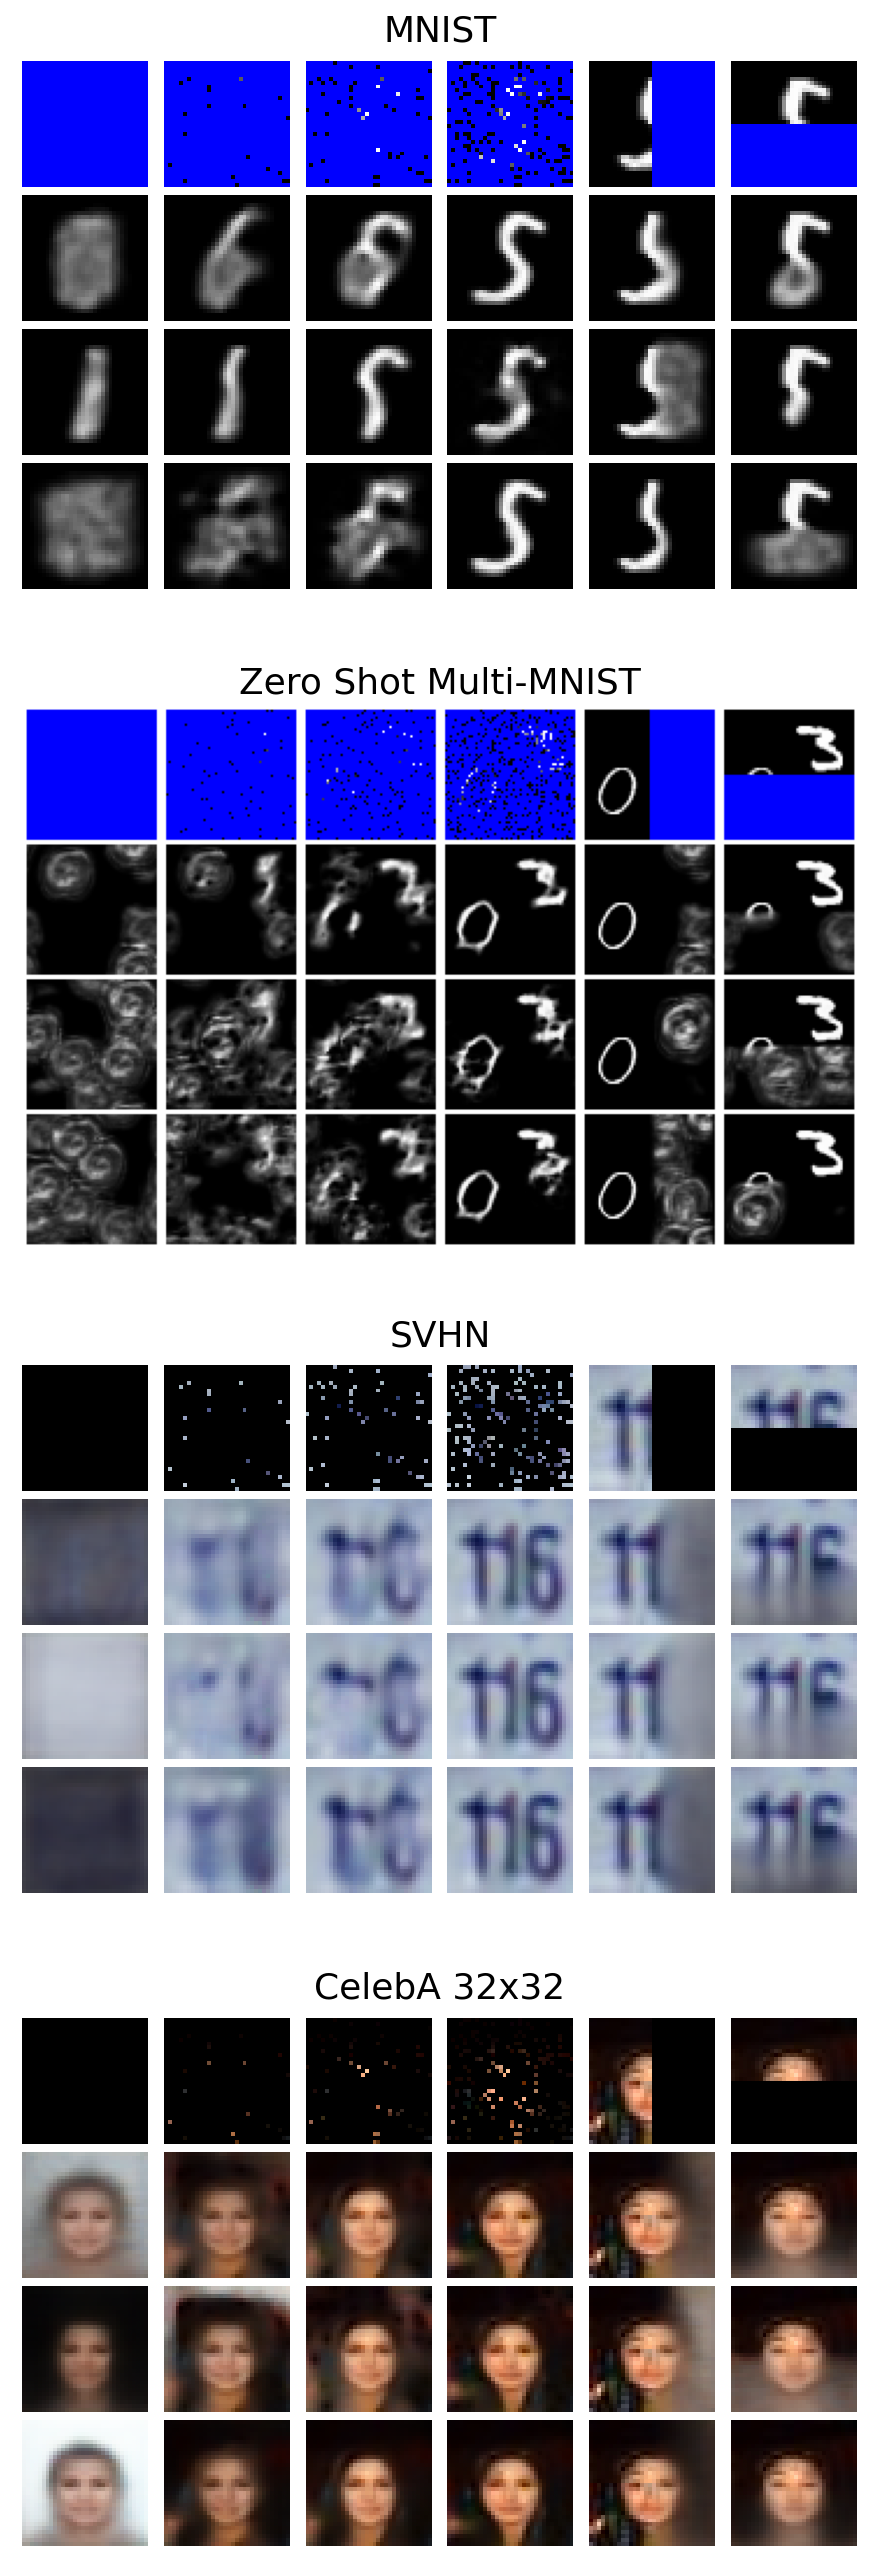

In [9]:
# 3 pixel, 1%, 5%, 10%, 20%, 30%, 50%, 100%, Half Bottom, Half Right
# Rows "mnist", "celeba32", "celeba64", "zs-multi-mnist", "svhn"
# use small model for "zs-multi-mnist"

context_maskers = [RandomMasker(min_nnz=0, max_nnz=0),
                   RandomMasker(min_nnz=0.02, max_nnz=0.02),
                   RandomMasker(min_nnz=0.05, max_nnz=0.05),
                   RandomMasker(min_nnz=0.15, max_nnz=0.15),
                   partial(half_masker, dim=1),
                   partial(half_masker, dim=0),
                  ]

data_models = [("mnist", "exp_final3_losses/mnist/ConvNPFXL_NllLNPF"),
               ("zsmms", "exp_final3_allmm_hetero/zsmms/ConvNPFL_NllLNPF"), # use the translation equivariant one
               ("svhn", "exp_losses_hetero/svhn/ConvNPFXL_NllLNPF"),
               ("celeba32", "exp_losses_hetero/celeba32/ConvNPFXL_NllLNPF")
              ]

fig, axes = plt.subplots(len(data_models), 1, figsize=(15,23))

for i,(data, model) in enumerate(data_models):
    grid = torch.cat([plot_posterior_samples(test_datasets[data], 
                                      GridCntxtTrgtGetter(context_masker=c,
                                                          target_masker=no_masker), 
                                      trainers['{}/run_0'.format(model)].module_.cpu(), 
                                      n_plots=1,
                                      is_uniform_grid=True,
                                      is_return=True,
                                      n_samples=3,
                                      is_select_different=True,
                                      seed=123 +  int("celeba64" in model)) # don't  show same images for celeba32 and celeba64
        for c in context_maskers], dim=2)
    
    axes[i].imshow(grid.permute(1, 2, 0).numpy())
    axes[i].axis("off")
    axes[i].set_title(PRETTY_RENAMER[data], fontsize=18)

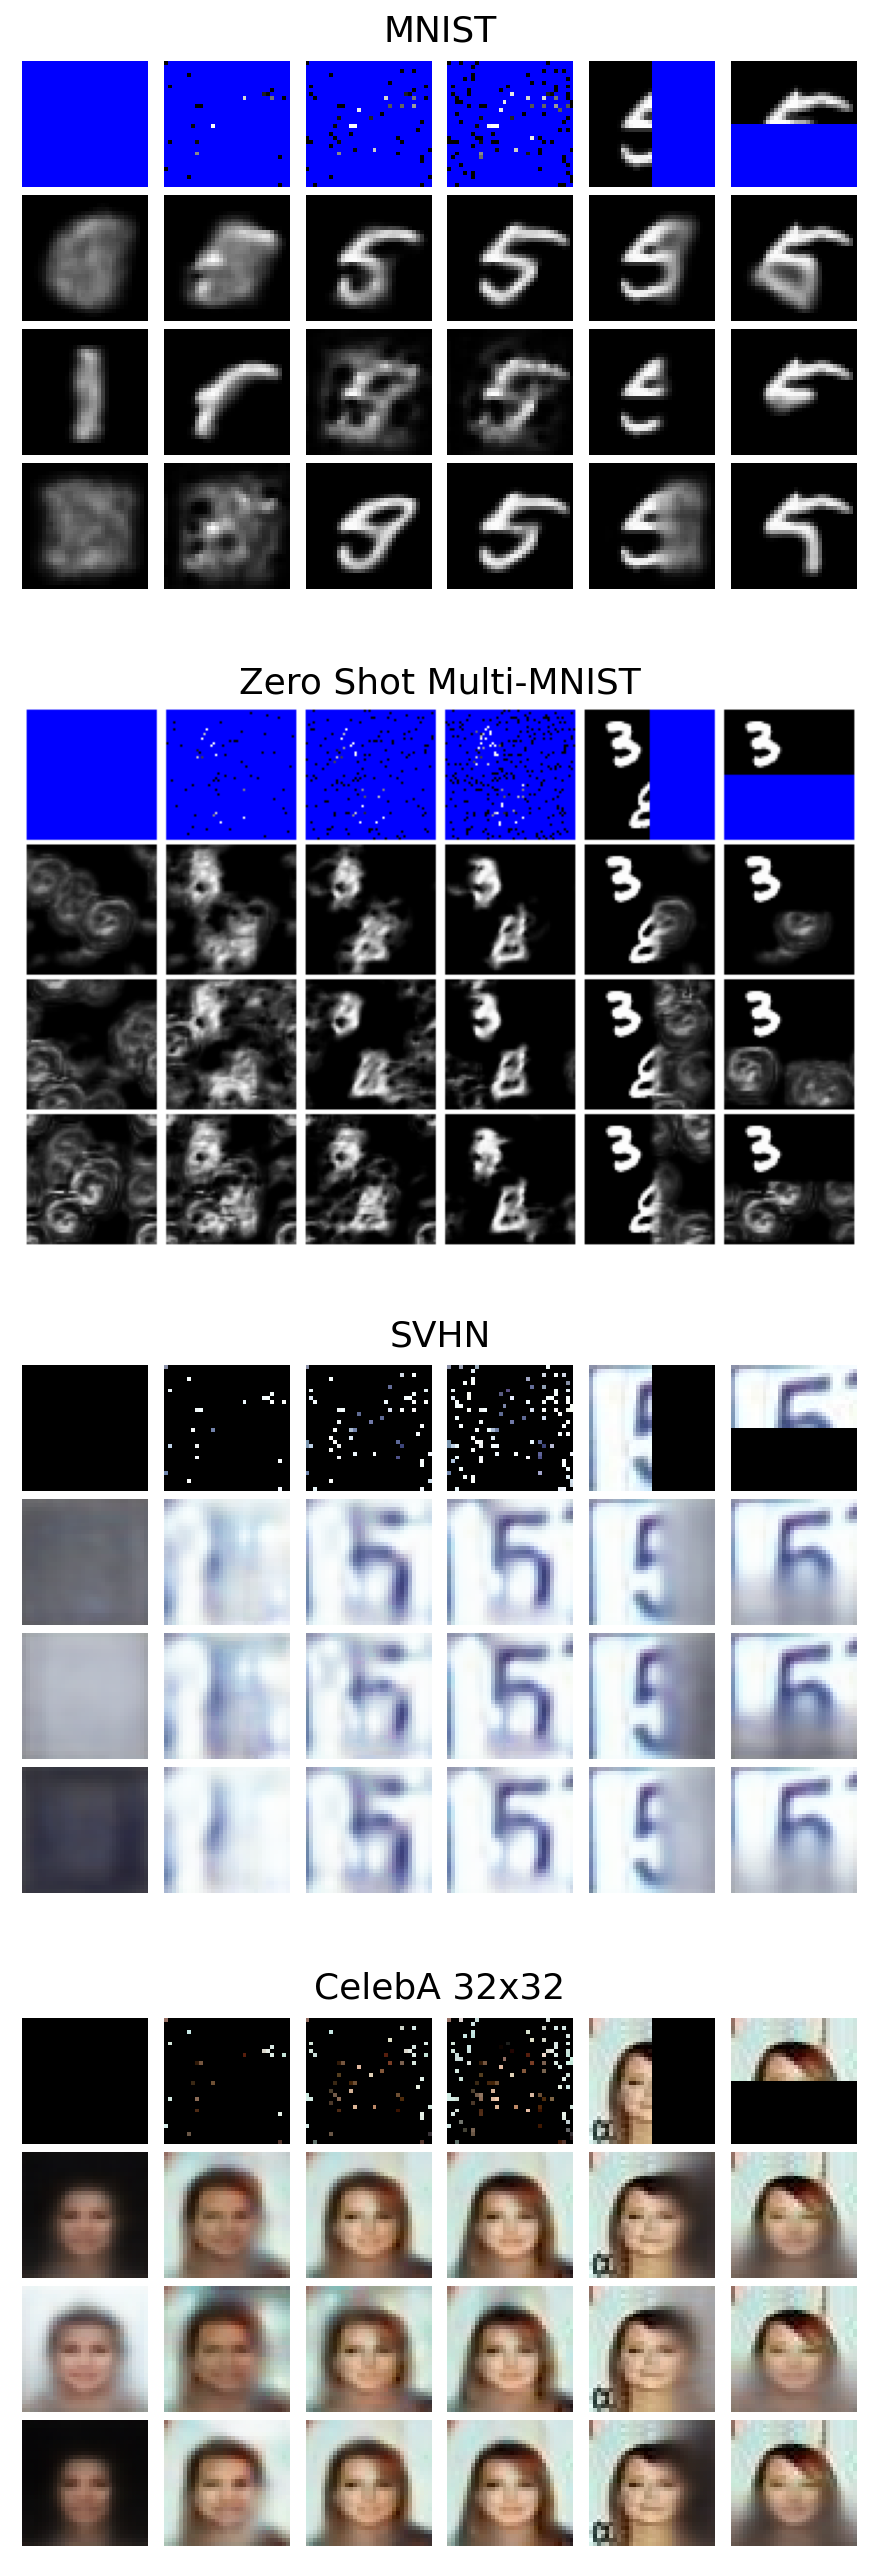

In [10]:
# 3 pixel, 1%, 5%, 10%, 20%, 30%, 50%, 100%, Half Bottom, Half Right
# Rows "mnist", "celeba32", "celeba64", "zs-multi-mnist", "svhn"
# use small model for "zs-multi-mnist"

context_maskers = [RandomMasker(min_nnz=0, max_nnz=0),
                   RandomMasker(min_nnz=0.02, max_nnz=0.02),
                   RandomMasker(min_nnz=0.05, max_nnz=0.05),
                   RandomMasker(min_nnz=0.1, max_nnz=0.1),
                   partial(half_masker, dim=1),
                   partial(half_masker, dim=0),
                  ]

data_models = [("mnist", "exp_losses_hetero/mnist/ConvNPFXL_NllLNPF"),
               ("zsmms", "exp_final3_allmm_hetero/zsmms/ConvNPFL_NllLNPF"), # use the translation equivariant one
               ("svhn", "exp_losses_hetero/svhn/ConvNPFXL_NllLNPF"),
               ("celeba32", "exp_losses_hetero/celeba32/ConvNPFXL_NllLNPF")
              ]

fig, axes = plt.subplots(len(data_models), 1, figsize=(15,23))

for i,(data, model) in enumerate(data_models):
    grid = torch.cat([plot_posterior_samples(test_datasets[data], 
                                      GridCntxtTrgtGetter(context_masker=c,
                                                          target_masker=no_masker), 
                                      trainers['{}/run_0'.format(model)].module_.cpu(), 
                                      n_plots=1,
                                      is_uniform_grid=True,
                                      is_return=True,
                                      n_samples=3,
                                      is_select_different=True,
                                      seed=128 +  int("celeba64" in model)) # don't  show same images for celeba32 and celeba64
        for c in context_maskers], dim=2)
    
    axes[i].imshow(grid.permute(1, 2, 0).numpy())
    axes[i].axis("off")
    axes[i].set_title(PRETTY_RENAMER[data], fontsize=18)

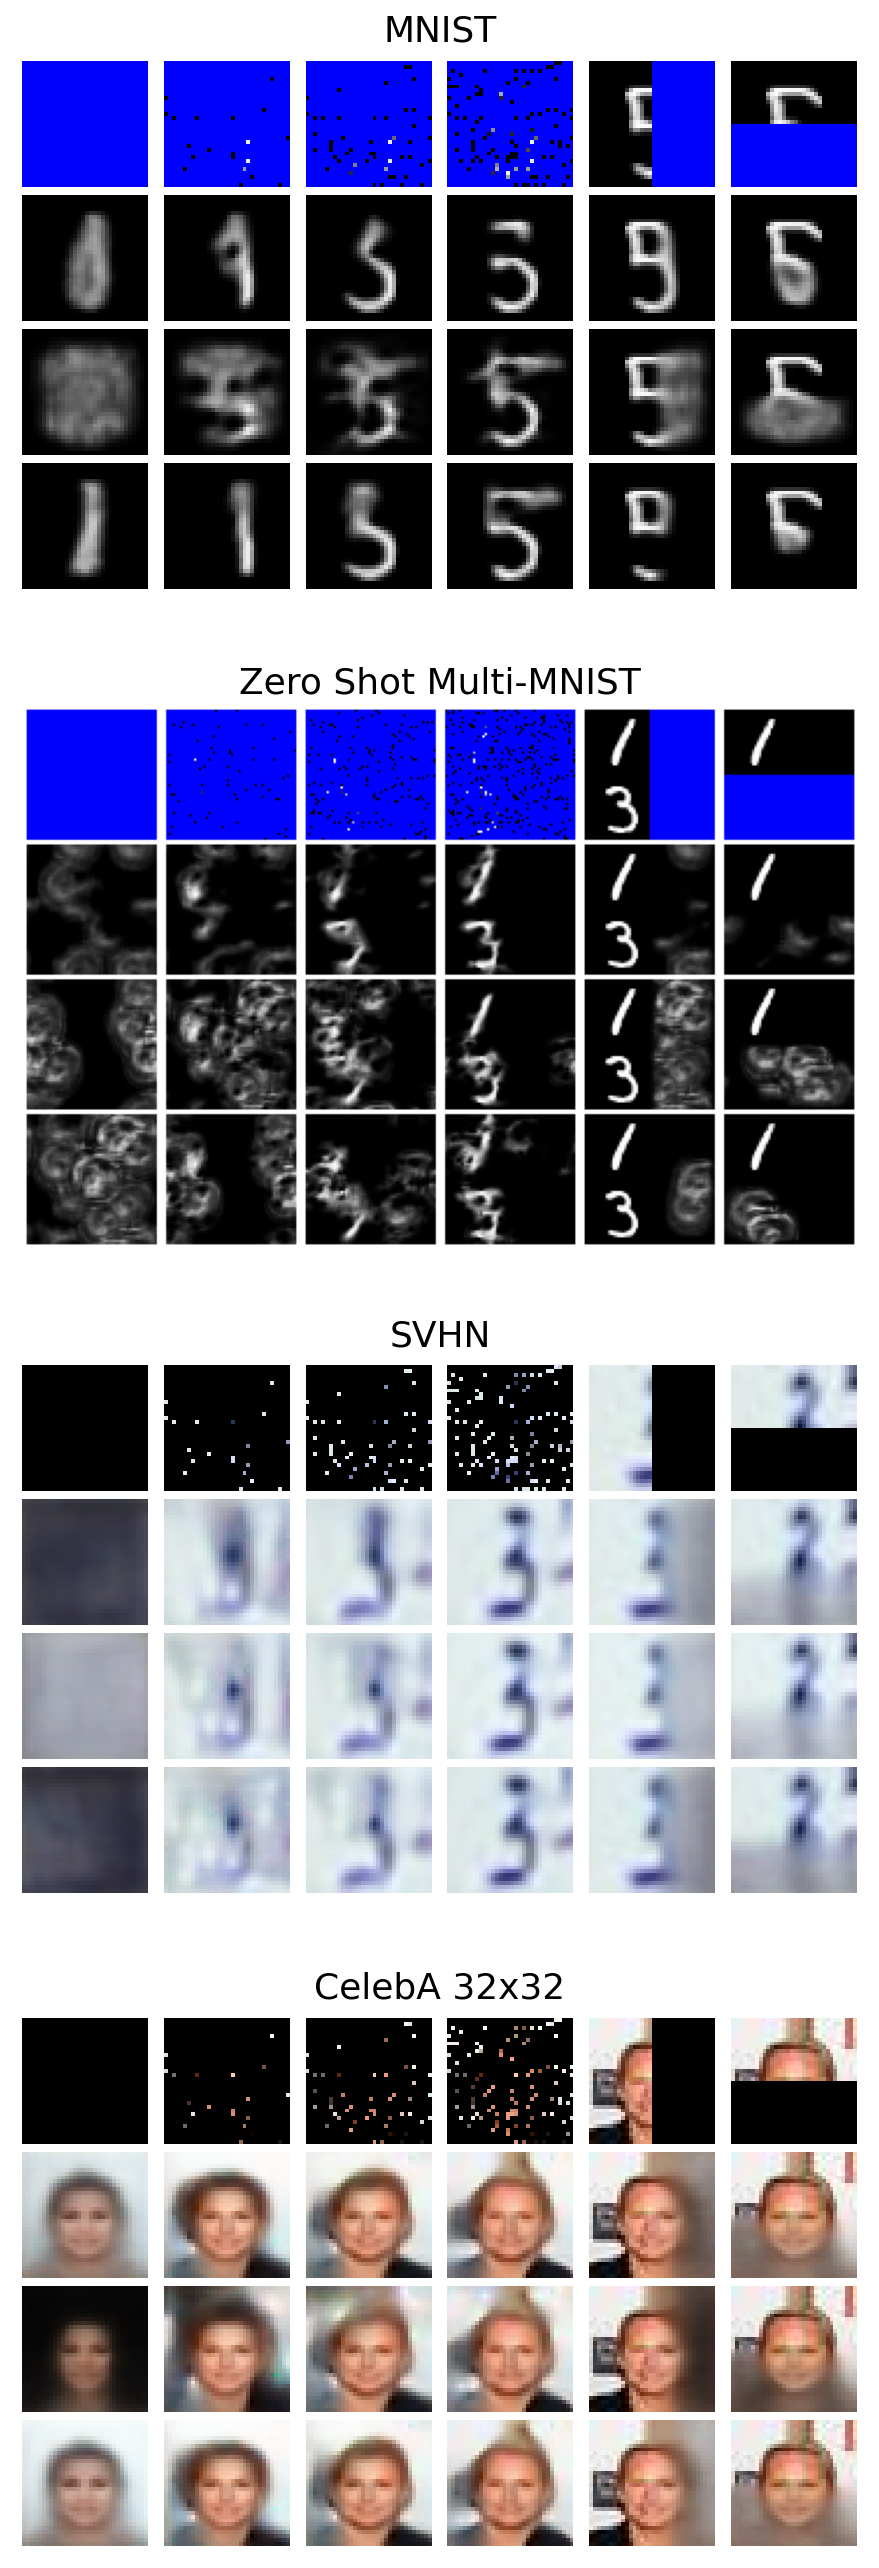

In [11]:
# 3 pixel, 1%, 5%, 10%, 20%, 30%, 50%, 100%, Half Bottom, Half Right
# Rows "mnist", "celeba32", "celeba64", "zs-multi-mnist", "svhn"
# use small model for "zs-multi-mnist"

context_maskers = [RandomMasker(min_nnz=0, max_nnz=0),
                   RandomMasker(min_nnz=0.02, max_nnz=0.02),
                   RandomMasker(min_nnz=0.05, max_nnz=0.05),
                   RandomMasker(min_nnz=0.1, max_nnz=0.1),
                   partial(half_masker, dim=1),
                   partial(half_masker, dim=0),
                  ]

data_models = [("mnist", "exp_losses_hetero/mnist/ConvNPFXL_NllLNPF"),
               ("zsmms", "exp_final3_allmm_hetero/zsmms/ConvNPFL_NllLNPF"), # use the translation equivariant one
               ("svhn", "exp_losses_hetero/svhn/ConvNPFXL_NllLNPF"),
               ("celeba32", "exp_losses_hetero/celeba32/ConvNPFXL_NllLNPF")
              ]

fig, axes = plt.subplots(len(data_models), 1, figsize=(15,23))

for i,(data, model) in enumerate(data_models):
    grid = torch.cat([plot_posterior_samples(test_datasets[data], 
                                      GridCntxtTrgtGetter(context_masker=c,
                                                          target_masker=no_masker), 
                                      trainers['{}/run_0'.format(model)].module_.cpu(), 
                                      n_plots=1,
                                      is_uniform_grid=True,
                                      is_return=True,
                                      n_samples=3,
                                      is_select_different=True,
                                      seed=3 +  int("celeba64" in model)) # don't  show same images for celeba32 and celeba64
        for c in context_maskers], dim=2)
    
    axes[i].imshow(grid.permute(1, 2, 0).numpy())
    axes[i].axis("off")
    axes[i].set_title(PRETTY_RENAMER[data], fontsize=18)

### Samples of different Models

In [12]:
trainers.keys()

dict_keys(['exp_losses_hetero/mnist/ConvNPFXL_NllLNPF/run_0', 'exp_losses_hetero/mnist/SelfAttnNPF_NllLNPF/run_0', 'exp_losses_hetero/svhn/ConvNPFXL_NllLNPF/run_0', 'exp_losses_hetero/svhn/SelfAttnNPF_NllLNPF/run_0', 'exp_losses_hetero/celeba32/ConvNPFXL_NllLNPF/run_0', 'exp_losses_hetero/celeba32/SelfAttnNPF_NllLNPF/run_0', 'exp_losses_hetero/mnist/ConvNPFXL_ElboLNPF/run_0', 'exp_losses_hetero/mnist/SelfAttnNPF_ElboLNPF/run_0', 'exp_losses_hetero/svhn/ConvNPFXL_ElboLNPF/run_0', 'exp_losses_hetero/svhn/SelfAttnNPF_ElboLNPF/run_0', 'exp_losses_hetero/celeba32/ConvNPFXL_ElboLNPF/run_0', 'exp_losses_hetero/celeba32/SelfAttnNPF_ElboLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/ConvNPFL_NllLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/SelfAttnNPF_NllLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/ConvNPFL_ElboLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/SelfAttnNPF_ElboLNPF/run_0'])

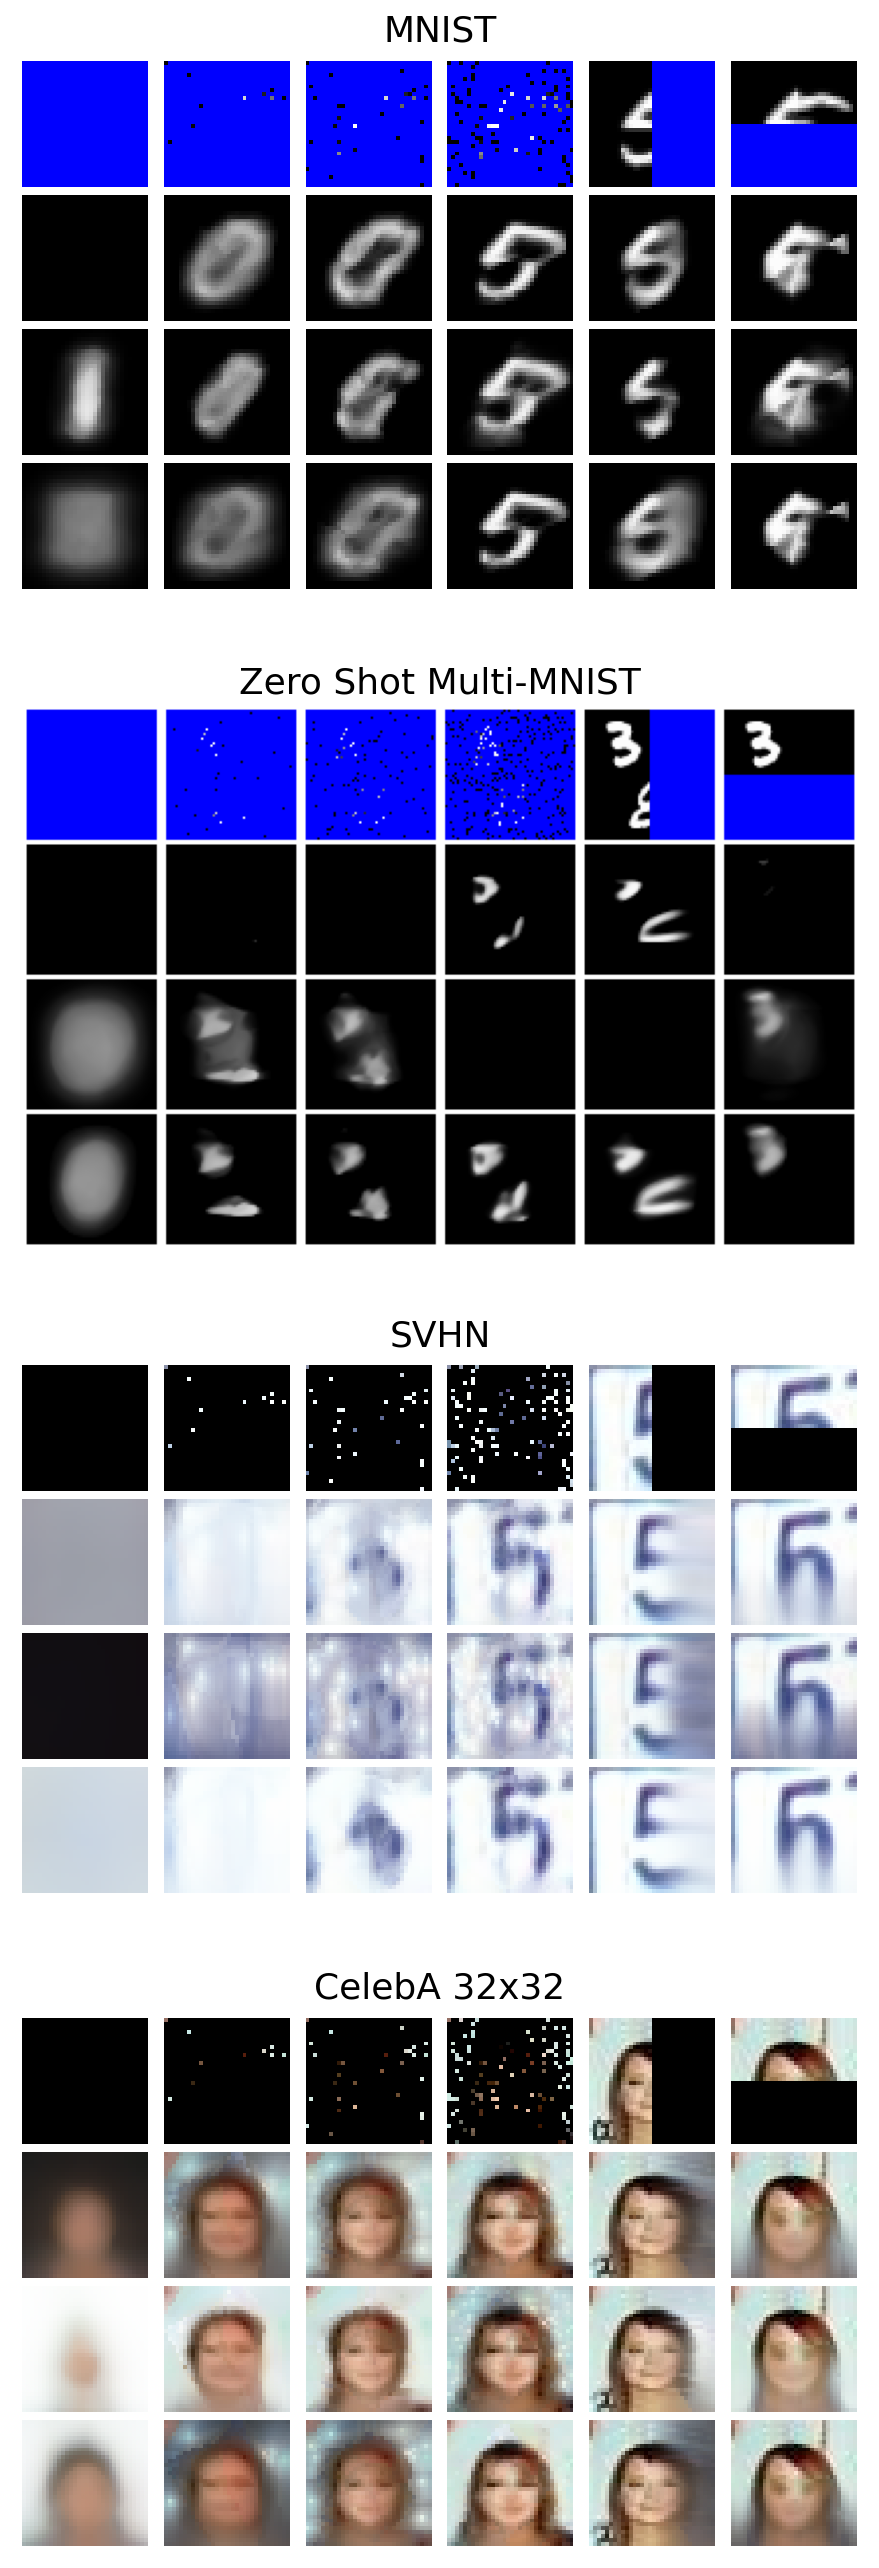

In [13]:
# 3 pixel, 1%, 5%, 10%, 20%, 30%, 50%, 100%, Half Bottom, Half Right
# Rows "mnist", "celeba32", "celeba64", "zs-multi-mnist", "svhn"
# use small model for "zs-multi-mnist"

context_maskers = [RandomMasker(min_nnz=0, max_nnz=0),
                   RandomMasker(min_nnz=0.01, max_nnz=0.01),
                   RandomMasker(min_nnz=0.03, max_nnz=0.03),
                   RandomMasker(min_nnz=0.1, max_nnz=0.1),
                   partial(half_masker, dim=1),
                   partial(half_masker, dim=0),
                  ]

data_models = [("mnist", "exp_losses_hetero/mnist/SelfAttnNPF_NllLNPF"),
               ("zsmms", "exp_final3_allmm_hetero/zsmms/SelfAttnNPF_NllLNPF"), # use the translation equivariant one
               ("svhn", "exp_losses_hetero/svhn/SelfAttnNPF_NllLNPF"),
               ("celeba32", "exp_losses_hetero/celeba32/SelfAttnNPF_NllLNPF")
              ]

fig, axes = plt.subplots(len(data_models), 1, figsize=(15,23))

for i,(data, model) in enumerate(data_models):
    grid = torch.cat([plot_posterior_samples(test_datasets[data], 
                                      GridCntxtTrgtGetter(context_masker=c,
                                                          target_masker=no_masker), 
                                      trainers['{}/run_0'.format(model)].module_.cpu(), 
                                      n_plots=1,
                                      is_uniform_grid=False,
                                      is_return=True,
                                      n_samples=3,
                                      is_select_different=True,
                                      seed=128 +  int("celeba64" in model)) # don't  show same images for celeba32 and celeba64
        for c in context_maskers], dim=2)
    
    axes[i].imshow(grid.permute(1, 2, 0).numpy())
    axes[i].axis("off")
    axes[i].set_title(PRETTY_RENAMER[data], fontsize=18)

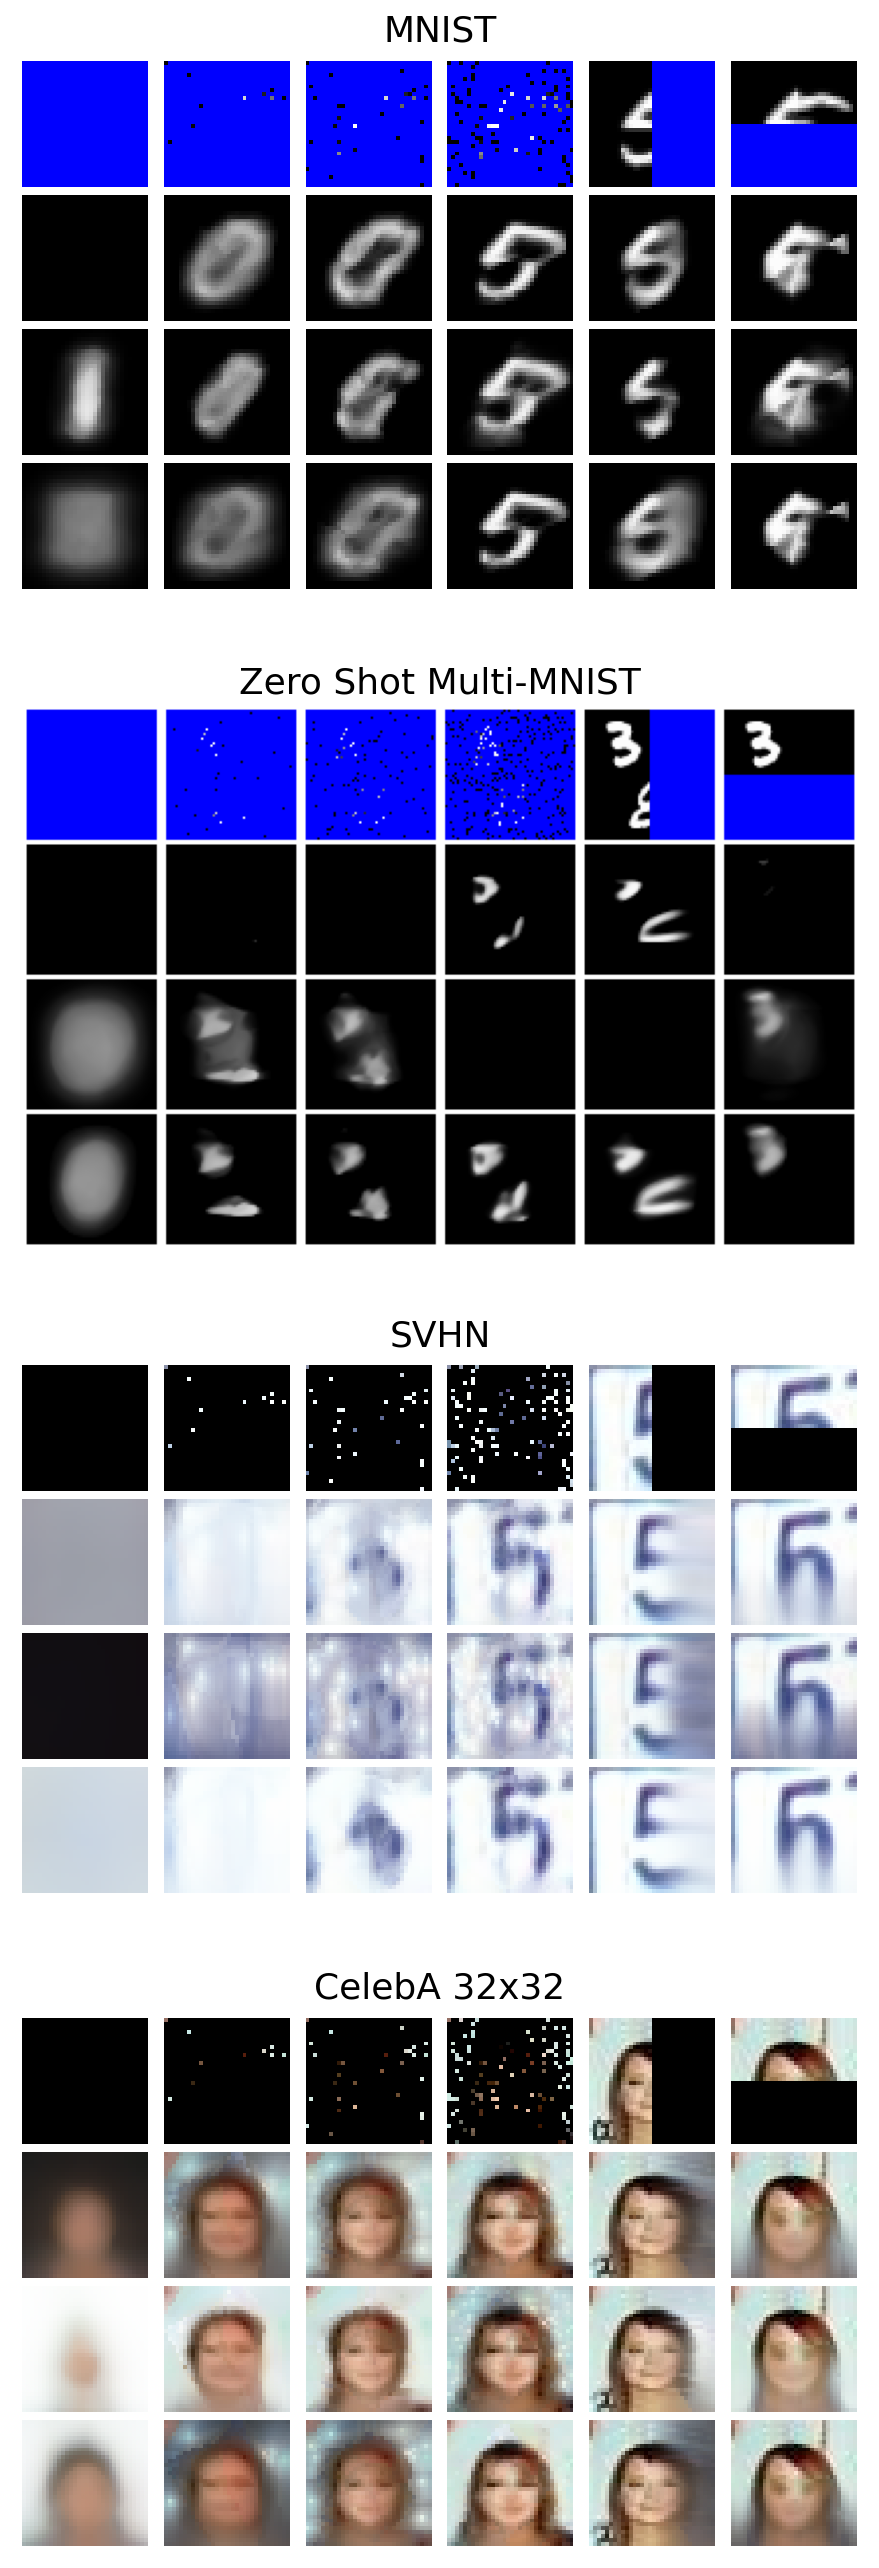

In [14]:
# 3 pixel, 1%, 5%, 10%, 20%, 30%, 50%, 100%, Half Bottom, Half Right
# Rows "mnist", "celeba32", "celeba64", "zs-multi-mnist", "svhn"
# use small model for "zs-multi-mnist"

context_maskers = [RandomMasker(min_nnz=0, max_nnz=0),
                   RandomMasker(min_nnz=0.01, max_nnz=0.01),
                   RandomMasker(min_nnz=0.03, max_nnz=0.03),
                   RandomMasker(min_nnz=0.1, max_nnz=0.1),
                   partial(half_masker, dim=1),
                   partial(half_masker, dim=0),
                  ]

data_models = [("mnist", "exp_losses_hetero/mnist/SelfAttnNPF_NllLNPF"),
               ("zsmms", "exp_final3_allmm_hetero/zsmms/SelfAttnNPF_NllLNPF"), # use the translation equivariant one
               ("svhn", "exp_losses_hetero/svhn/SelfAttnNPF_NllLNPF"),
               ("celeba32", "exp_losses_hetero/celeba32/SelfAttnNPF_NllLNPF")
              ]

fig, axes = plt.subplots(len(data_models), 1, figsize=(15,23))

for i,(data, model) in enumerate(data_models):
    grid = torch.cat([plot_posterior_samples(test_datasets[data], 
                                      GridCntxtTrgtGetter(context_masker=c,
                                                          target_masker=no_masker), 
                                      trainers['{}/run_0'.format(model)].module_.cpu(), 
                                      n_plots=1,
                                      is_uniform_grid=False,
                                      is_return=True,
                                      n_samples=3,
                                      is_select_different=True,
                                      seed=128 +  int("celeba64" in model)) # don't  show same images for celeba32 and celeba64
        for c in context_maskers], dim=2)
    
    axes[i].imshow(grid.permute(1, 2, 0).numpy())
    axes[i].axis("off")
    axes[i].set_title(PRETTY_RENAMER[data], fontsize=18)

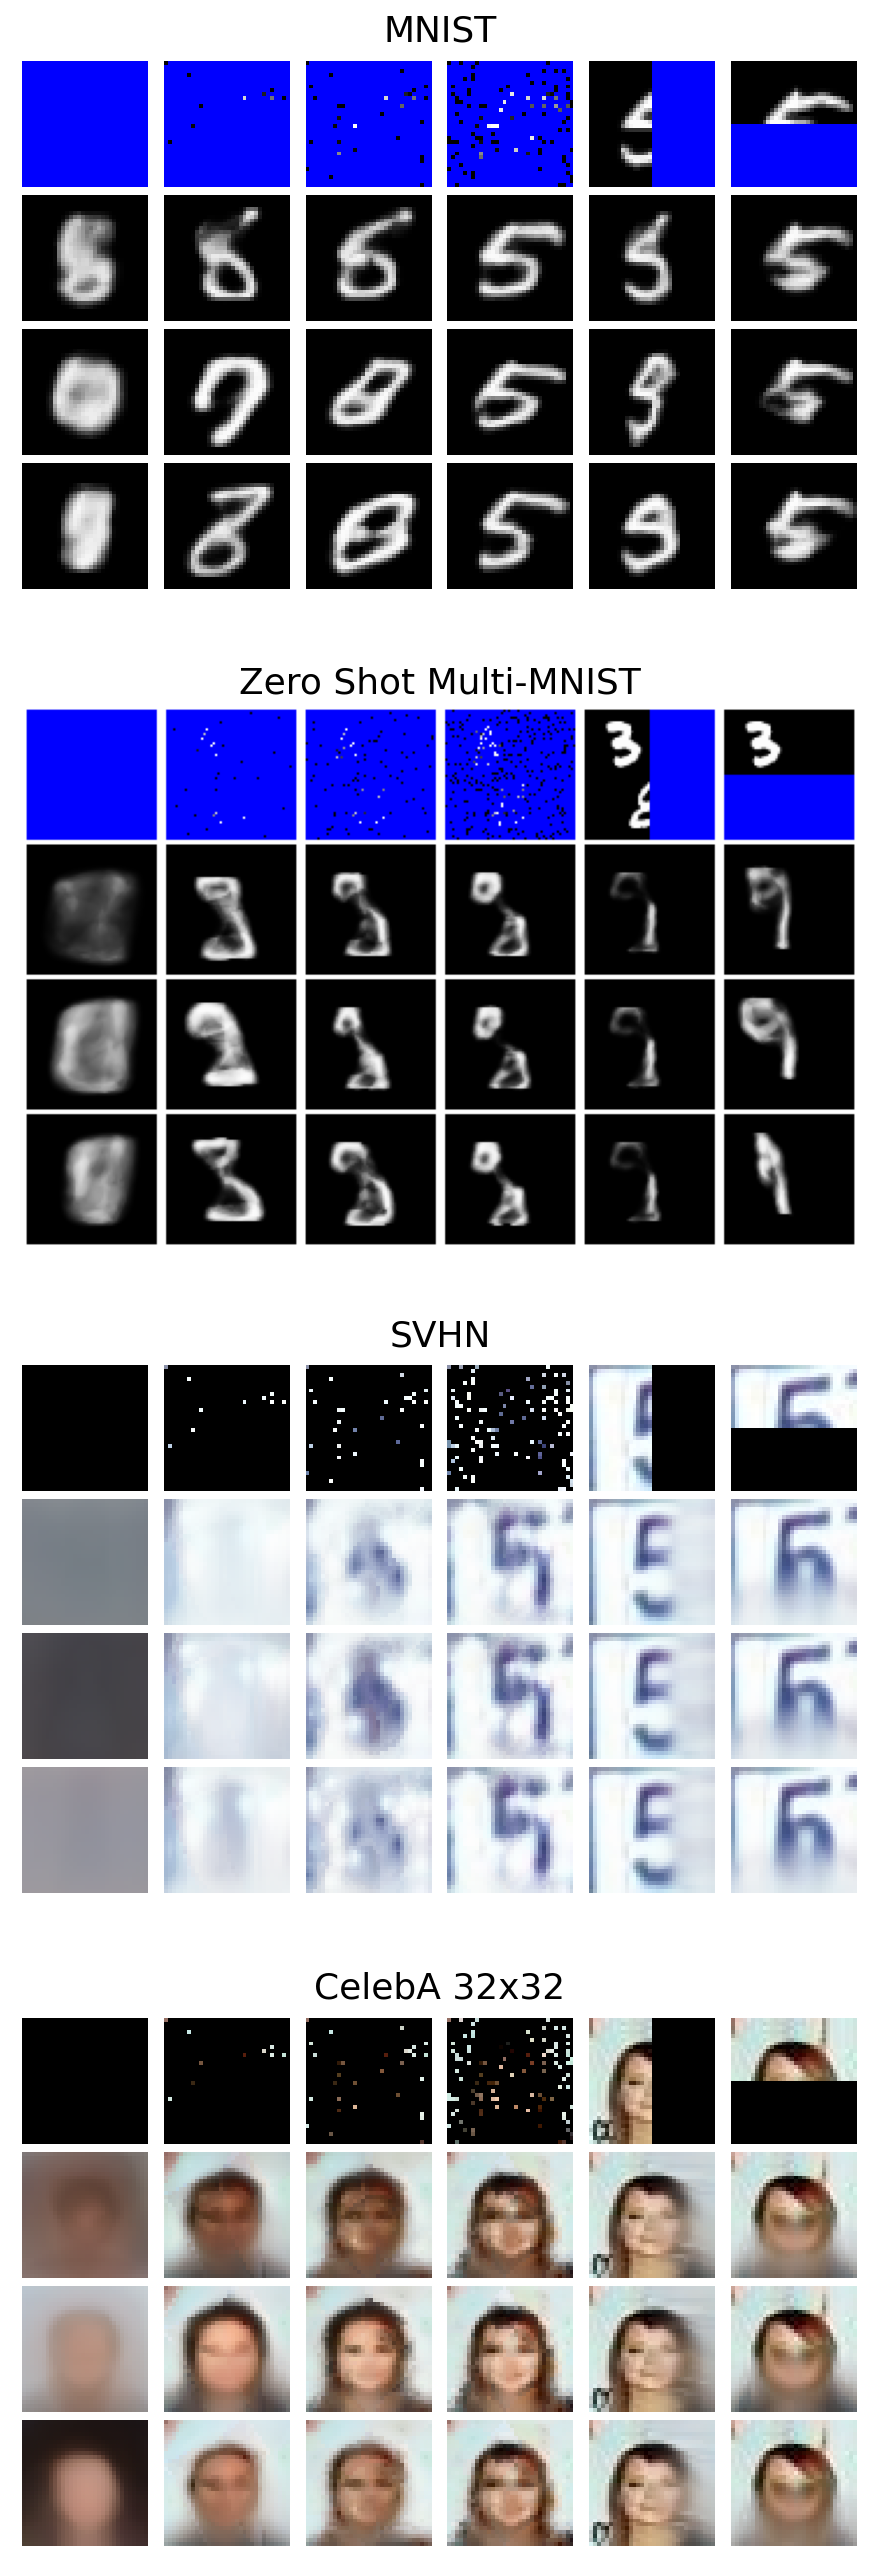

In [14]:
# 3 pixel, 1%, 5%, 10%, 20%, 30%, 50%, 100%, Half Bottom, Half Right
# Rows "mnist", "celeba32", "celeba64", "zs-multi-mnist", "svhn"
# use small model for "zs-multi-mnist"

context_maskers = [RandomMasker(min_nnz=0, max_nnz=0),
                   RandomMasker(min_nnz=0.01, max_nnz=0.01),
                   RandomMasker(min_nnz=0.03, max_nnz=0.03),
                   RandomMasker(min_nnz=0.1, max_nnz=0.1),
                   partial(half_masker, dim=1),
                   partial(half_masker, dim=0),
                  ]

data_models = [("mnist", "exp_losses_hetero/mnist/SelfAttnNPF_ElboLNPF"),
               ("zsmms", "exp_final3_allmm_hetero/zsmms/SelfAttnNPF_ElboLNPF"), # use the translation equivariant one
               ("svhn", "exp_losses_hetero/svhn/SelfAttnNPF_ElboLNPF"),
               ("celeba32", "exp_losses_hetero/celeba32/SelfAttnNPF_ElboLNPF")
              ]

fig, axes = plt.subplots(len(data_models), 1, figsize=(15,23))

for i,(data, model) in enumerate(data_models):
    grid = torch.cat([plot_posterior_samples(test_datasets[data], 
                                      GridCntxtTrgtGetter(context_masker=c,
                                                          target_masker=no_masker), 
                                      trainers['{}/run_0'.format(model)].module_.cpu(), 
                                      n_plots=1,
                                      is_uniform_grid=False,
                                      is_return=True,
                                      n_samples=3,
                                      is_select_different=True,
                                      seed=128 +  int("celeba64" in model)) # don't  show same images for celeba32 and celeba64
        for c in context_maskers], dim=2)
    
    axes[i].imshow(grid.permute(1, 2, 0).numpy())
    axes[i].axis("off")
    axes[i].set_title(PRETTY_RENAMER[data], fontsize=18)

### Comparion with AttnLNP


In [15]:
trainers.keys()

dict_keys(['exp_losses_hetero/mnist/ConvNPFXL_NllLNPF/run_0', 'exp_losses_hetero/mnist/SelfAttnNPF_NllLNPF/run_0', 'exp_losses_hetero/svhn/ConvNPFXL_NllLNPF/run_0', 'exp_losses_hetero/svhn/SelfAttnNPF_NllLNPF/run_0', 'exp_losses_hetero/celeba32/ConvNPFXL_NllLNPF/run_0', 'exp_losses_hetero/celeba32/SelfAttnNPF_NllLNPF/run_0', 'exp_losses_hetero/mnist/ConvNPFXL_ElboLNPF/run_0', 'exp_losses_hetero/mnist/SelfAttnNPF_ElboLNPF/run_0', 'exp_losses_hetero/svhn/ConvNPFXL_ElboLNPF/run_0', 'exp_losses_hetero/svhn/SelfAttnNPF_ElboLNPF/run_0', 'exp_losses_hetero/celeba32/ConvNPFXL_ElboLNPF/run_0', 'exp_losses_hetero/celeba32/SelfAttnNPF_ElboLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/ConvNPFL_NllLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/SelfAttnNPF_NllLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/ConvNPFL_ElboLNPF/run_0', 'exp_final3_allmm_hetero/zsmms/SelfAttnNPF_ElboLNPF/run_0'])

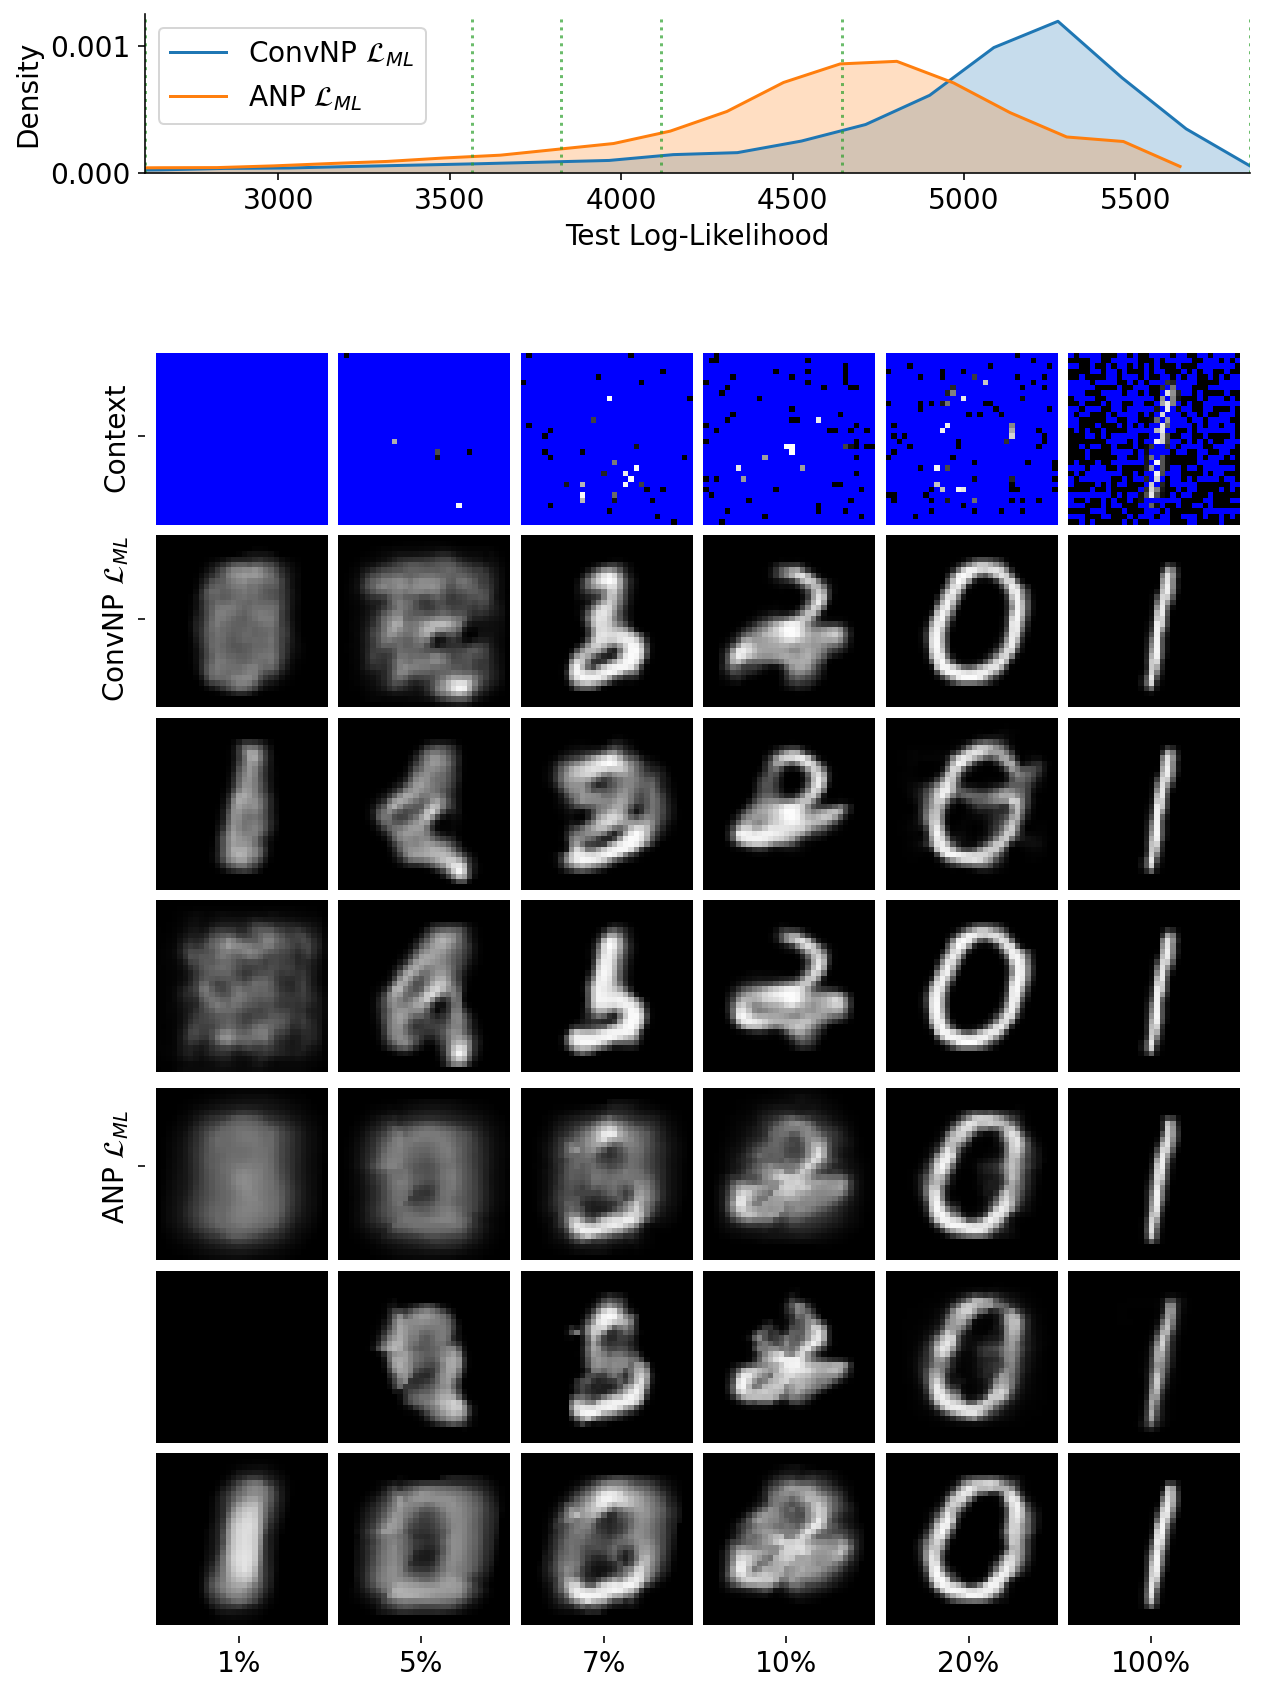

In [16]:
plot_qualitative_with_kde_compare_samples(
    f'exp_losses_hetero/mnist/ConvNPFXL_NllLNPF/run_0', 
    f"exp_losses_hetero/mnist/SelfAttnNPF_NllLNPF/run_0", 
    trainers, 
    test_datasets,
)

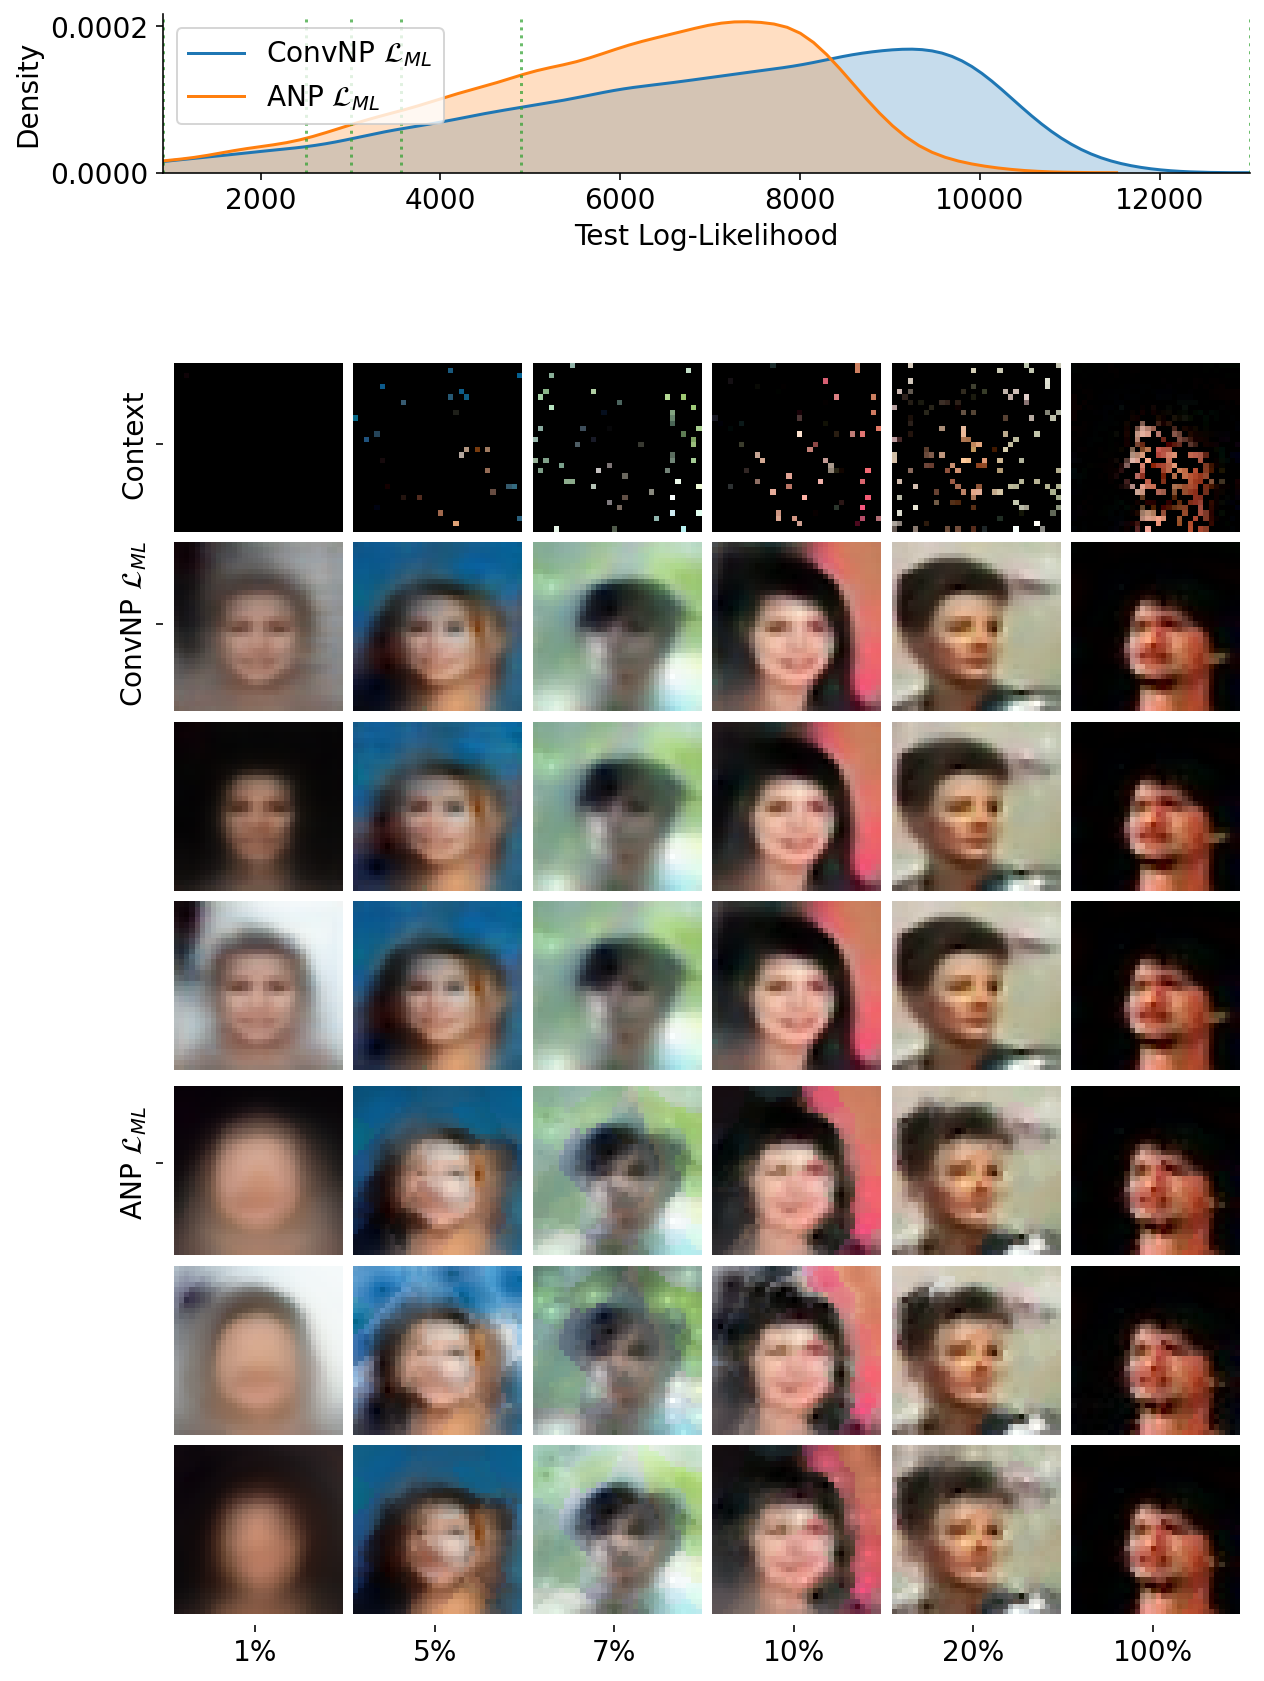

In [17]:
plot_qualitative_with_kde_compare_samples(
    f'exp_losses_hetero/celeba32/ConvNPFXL_NllLNPF/run_0', 
    f"exp_losses_hetero/celeba32/SelfAttnNPF_NllLNPF/run_0", 
    trainers, 
    test_datasets,
)

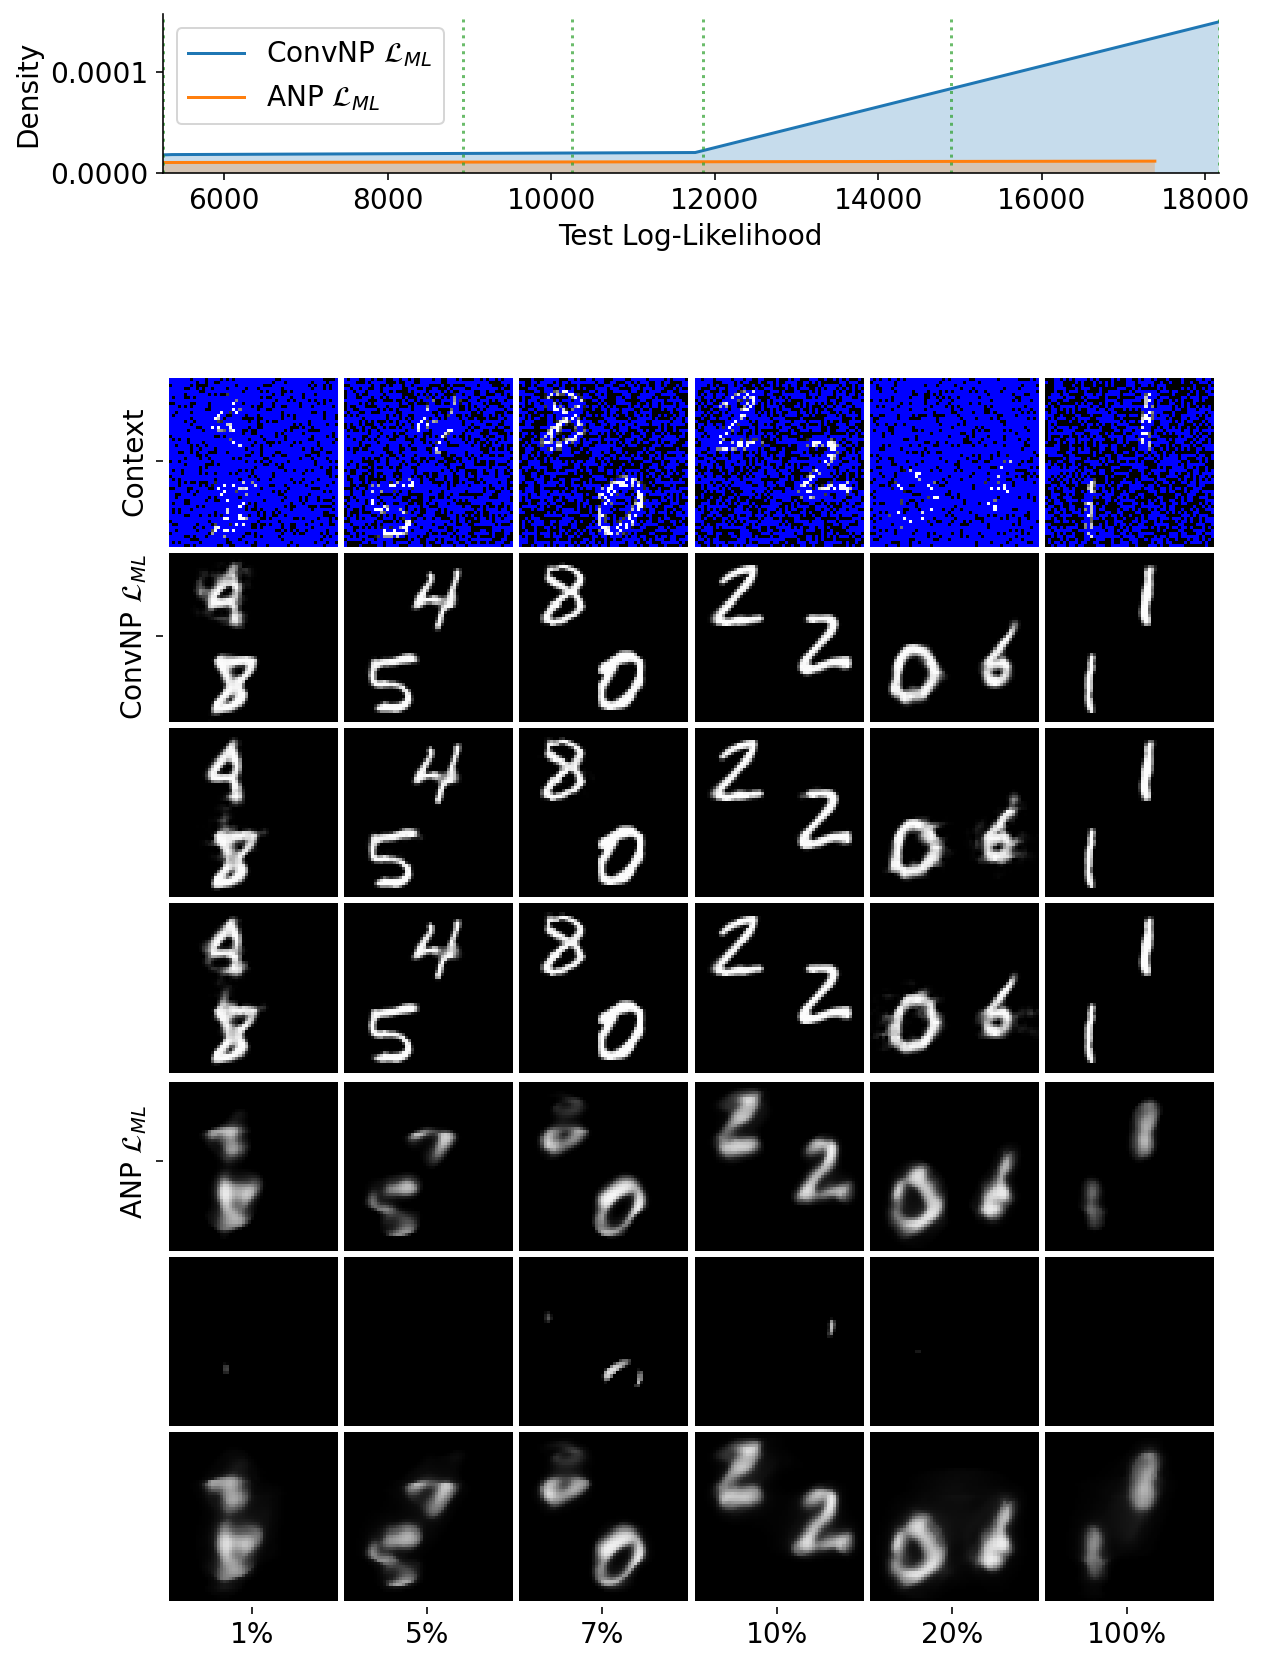

In [19]:
plot_qualitative_with_kde_compare_samples(
    f"exp_final3_allmm_hetero/zsmms/ConvNPFL_NllLNPF/run_0", 
    f"exp_final3_allmm_hetero/zsmms/SelfAttnNPF_NllLNPF/run_0", 
    trainers, 
    test_datasets,
)

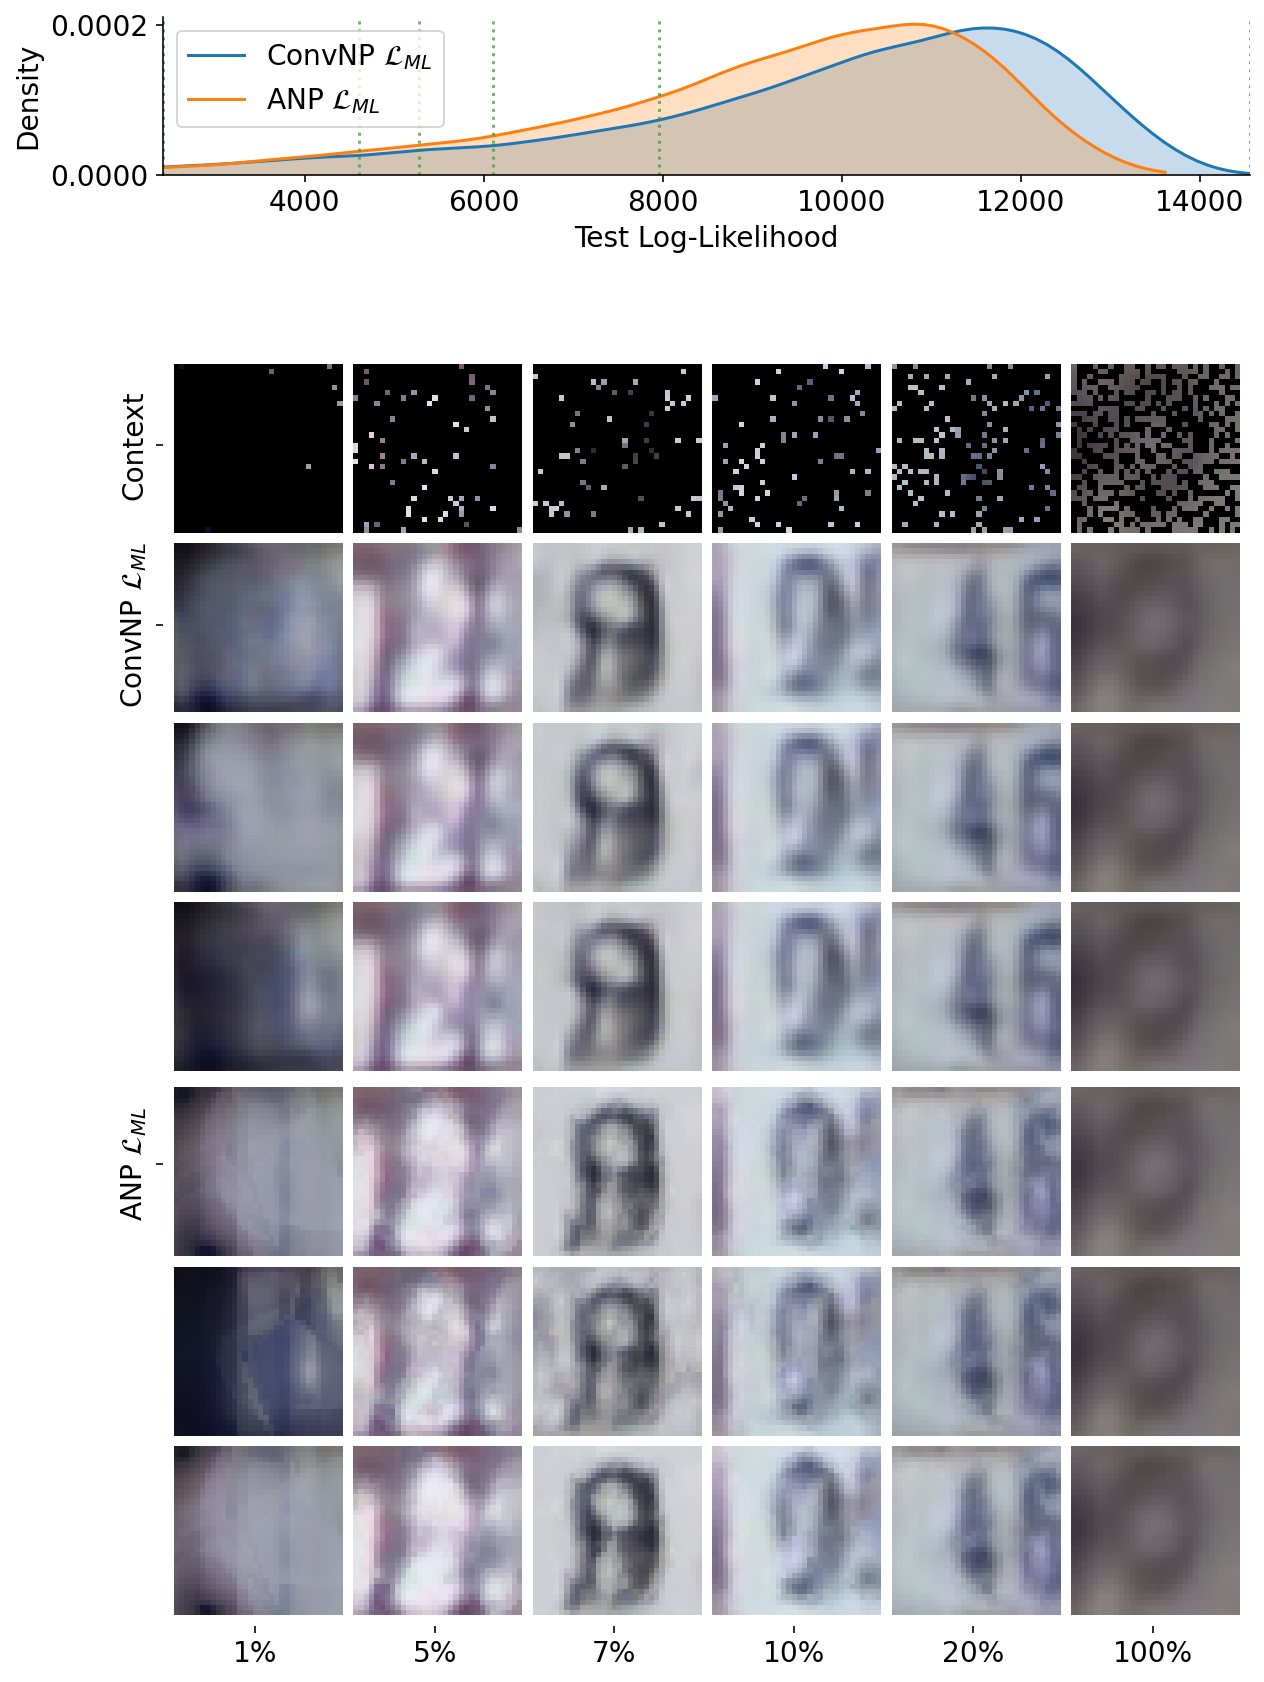

In [19]:
plot_qualitative_with_kde_compare_samples(
    f"exp_losses_hetero/svhn/ConvNPFXL_NllLNPF/run_0", 
    f"exp_losses_hetero/svhn/SelfAttnNPF_NllLNPF/run_0", 
    trainers, 
    test_datasets,
)

### Comparion of losses


In [12]:
trainers.keys()

dict_keys(['exp_final_images/mnist/ConvNPFXXL_NllLNPF/run_0', 'exp_final_images/svhn/ConvNPFXXL_NllLNPF/run_0', 'exp_final_images/celeba32/ConvNPFXXL_NllLNPF/run_0', 'exp_final3_losses/mnist/ConvNPFXL_NllLNPF/run_0', 'exp_final3_losses/mnist/SelfAttnNPF_NllLNPF/run_0', 'exp_final3_losses/svhn/ConvNPFXL_NllLNPF/run_0', 'exp_final3_losses/svhn/SelfAttnNPF_NllLNPF/run_0', 'exp_final3_losses/celeba32/ConvNPFXL_NllLNPF/run_0', 'exp_final3_losses/celeba32/SelfAttnNPF_NllLNPF/run_0', 'exp_final3_losses/mnist/ConvNPFXL_ElboLNPF/run_0', 'exp_final3_losses/mnist/SelfAttnNPF_ElboLNPF/run_0', 'exp_final3_losses/svhn/ConvNPFXL_ElboLNPF/run_0', 'exp_final3_losses/svhn/SelfAttnNPF_ElboLNPF/run_0', 'exp_final3_losses/celeba32/ConvNPFXL_ElboLNPF/run_0', 'exp_final3_losses/celeba32/SelfAttnNPF_ElboLNPF/run_0', 'exp_final3_allmm/zsmms/ConvNPFL_NllLNPF/run_0', 'exp_final3_allmm/zsmms/SelfAttnNPF_NllLNPF/run_0', 'exp_final3_allmm/zsmms/ConvNPFL_ElboLNPF/run_0', 'exp_final3_allmm/zsmms/SelfAttnNPF_ElboLNPF/

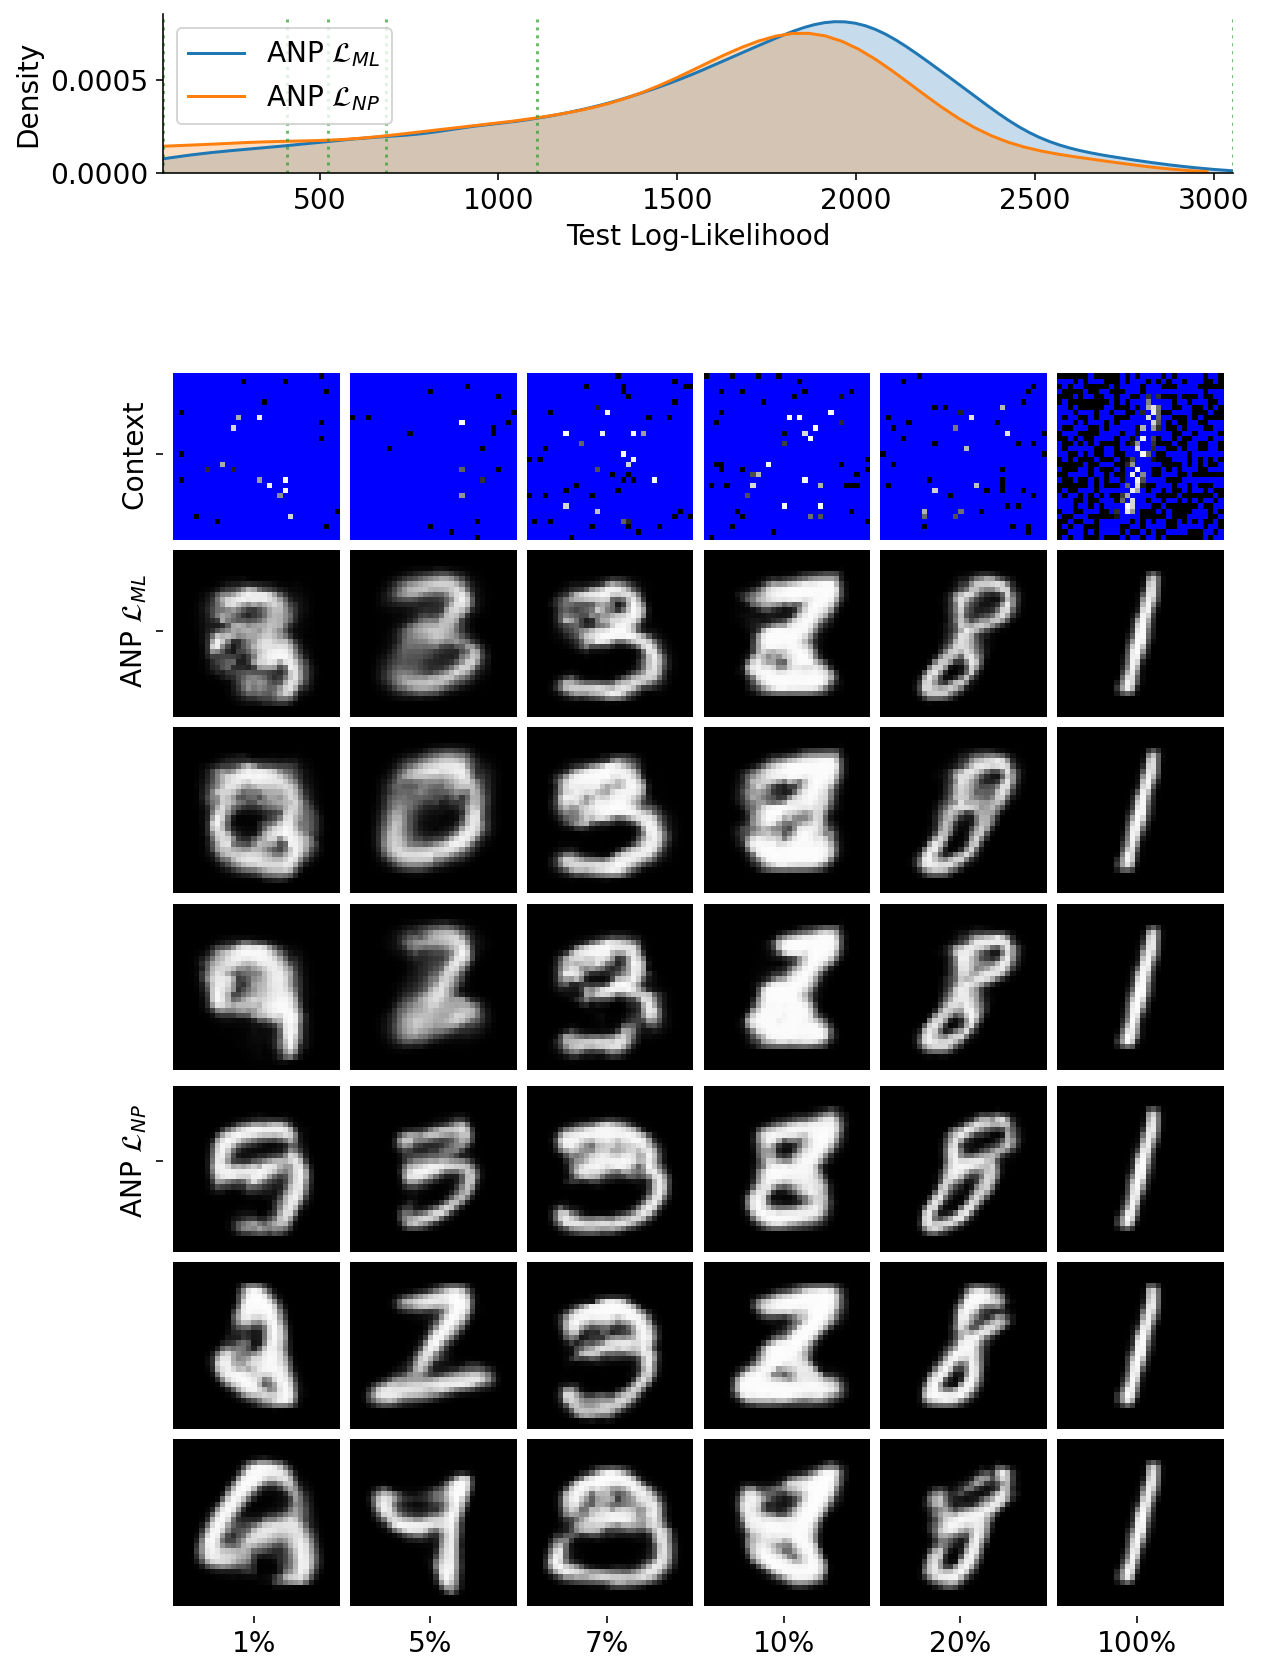

In [13]:
plot_qualitative_with_kde_compare_samples(
    f"exp_final3_losses/mnist/SelfAttnNPF_NllLNPF/run_0", 
    f"exp_final3_losses/mnist/SelfAttnNPF_ElboLNPF/run_0", 
    trainers, 
    test_datasets,
)

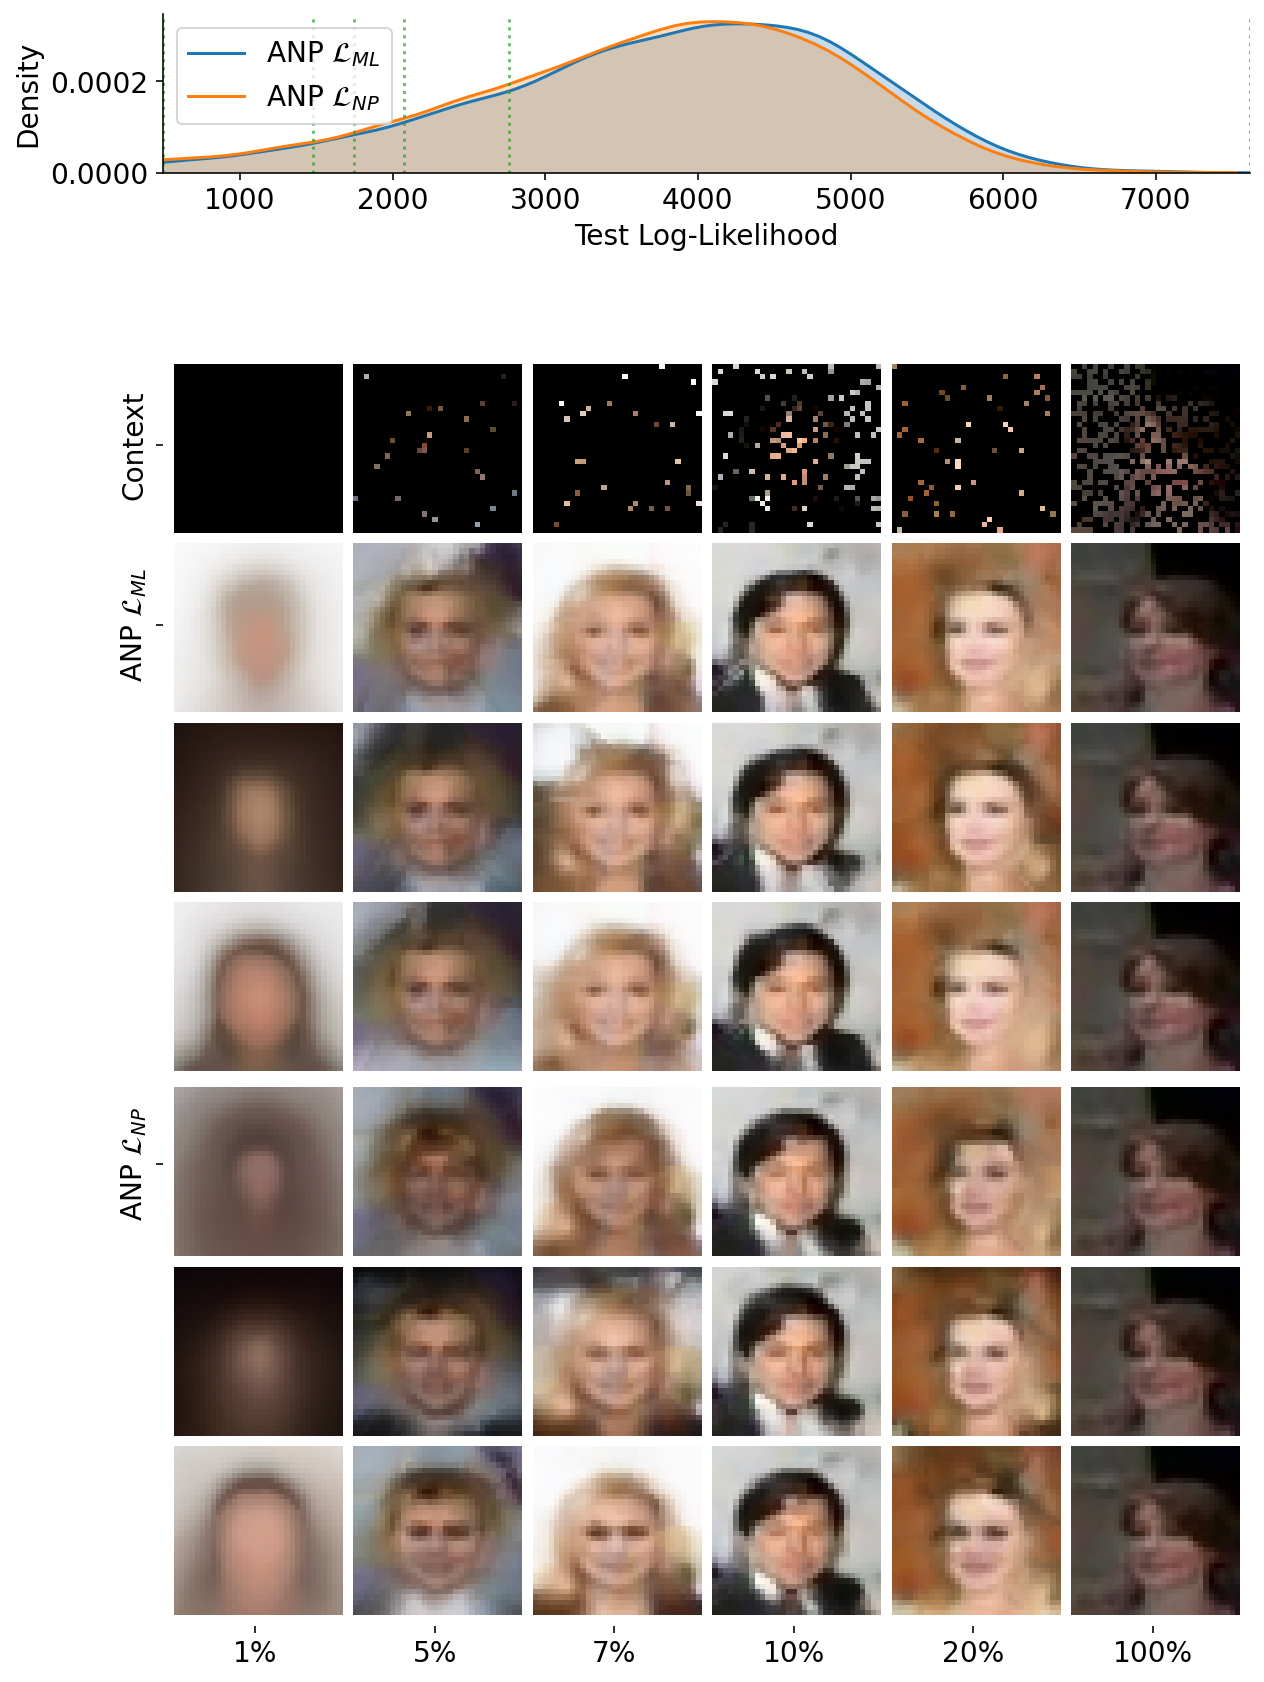

In [14]:
plot_qualitative_with_kde_compare_samples(
    f"exp_final3_losses/celeba32/SelfAttnNPF_NllLNPF/run_0", 
    f"exp_final3_losses/celeba32/SelfAttnNPF_ElboLNPF/run_0", 
    trainers, 
    test_datasets,
)

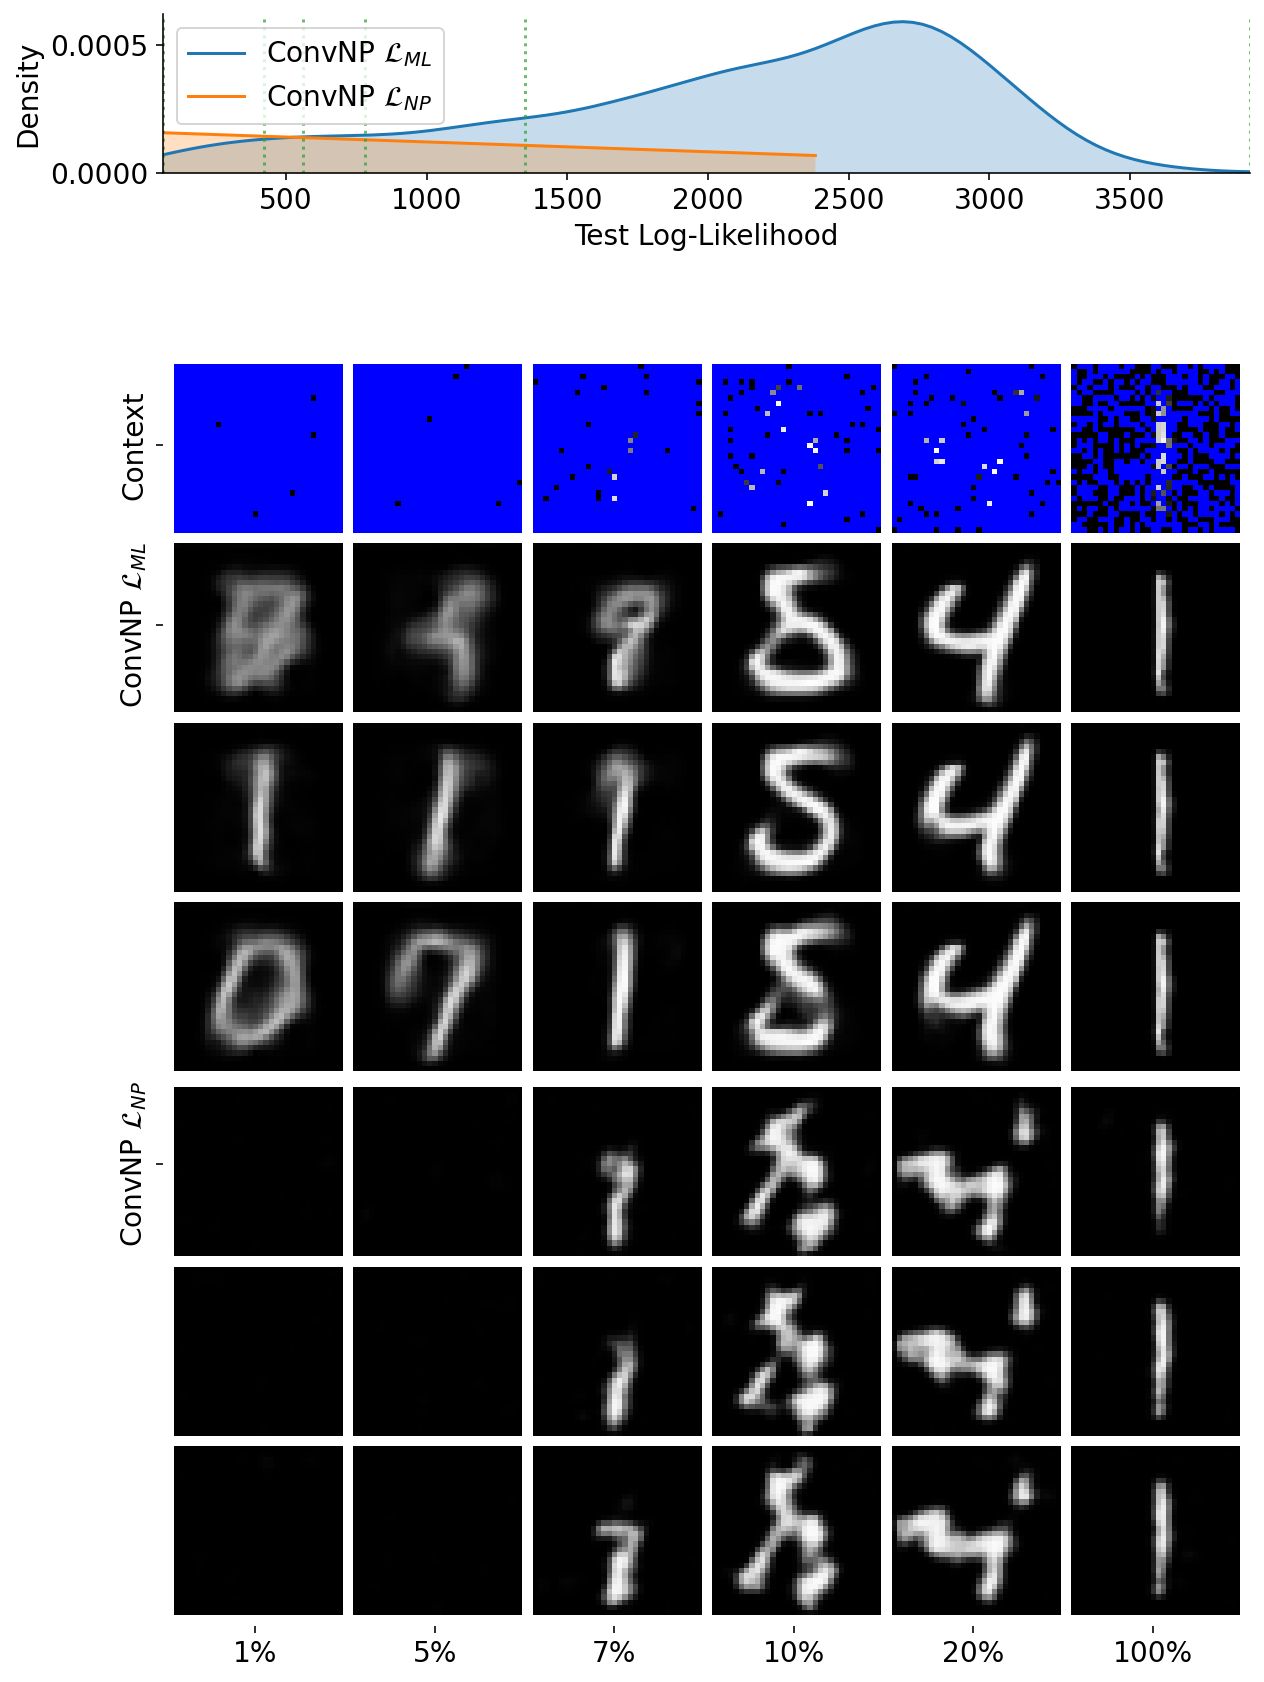

In [7]:
plot_qualitative_with_kde_compare_samples(
    f"exp_final3_losses/mnist/ConvNPFXL_NllLNPF/run_0", 
    f"exp_final3_losses/mnist/ConvNPFXL_ElboLNPF/run_0", 
    trainers, 
    test_datasets,
)